# View All Simulations

Section 1 - Import code and make definitions

Section 2 - View the simulations

## Section 1 - Import code and make definitions

### Before running for the first time you will need to execute Code Block 1 in TauP_plots.ipynb

### The simulations are stored at the Zenodo repository https://doi.org/10.5281/zenodo.10631693 

### You will need to extract the simulations and store them in top_dir
### e.g. if you have a folder called 128b_VPREMOON_atten_surface_2 and it is in /Users/cnunn/lunar_data/axisem3d_runs/ then the top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'

In [1]:
# top level dir 

######## 
# Extract the AxiSEM3D runs to a directory and set the top directory HERE 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

In [2]:
# %matplotlib notebook
%matplotlib inline

# calculate the taup models
from obspy.taup import TauPyModel
import time

calculated_VPREMOON = TauPyModel(model='VPREMOON_atten_taup')
calculated_ISSI_M1 = TauPyModel(model='ISSI_MOON_M1_atten_taup')
calculated_VPREMOON_atten_no_LVZ_taup = TauPyModel(model='VPREMOON_atten_no_LVZ_taup')

calculated_taup_dict =	{
  "VPREMOON_taup": calculated_VPREMOON,
  "ISSI_MOON_M1_taup": calculated_ISSI_M1,
    'VPREMOON_atten_no_LVZ_taup':calculated_VPREMOON_atten_no_LVZ_taup
}

from obspy.core import Stream, UTCDateTime
from obspy import read_inventory

from postprocessing_util_observations import get_observations_local
from postprocessing_util import get_all_streams_from_netcdf
from postprocessing_util import plot_epicentral_distance_taup
from postprocessing_util import plot_envelope_taup

phase_list_ISSI = ["P", "PP", "PS", "PSS", "2.15kmps","0.57kmps"]
phase_list_VPREMOON_layered = [
    "P",
    "PS",
    "2.47kmps",
    "0.77kmps",
    "0.47kmps"
]

phase_list_VPREMOON_layered_no_LVZ = [
    "P",
    "PS",
    "2.27kmps",
    "1.66kmps",
    "1.21kmps"
]




distance_examples={
    2:2.167025997371414,
    5:5.075044339909034,
    25:25.432357813795228,
    28:28.047339965833054,
    34:34.560784470873635,
    57:57.67071530277473
}
    
    
# epicentral distances of the events used     
# A13/S-IVB 4.480908613215989
# A14/S-IVB 5.783787517596895
# A15/S-IVB 11.718510058287118
# A15/S-IVB 6.118664372615061
# A16/S-IVB 5.075044339909034
# A16/S-IVB 9.054122437295218
# A16/S-IVB 36.37690556827287
# A17/S-IVB 11.13215379702135
# A17/S-IVB 5.161473408558756
# A17/S-IVB 34.01814904542429
# A17/S-IVB 28.047339965833054
# A12/LM 2.4252731172780972
# A14/LM 3.8036577155384563
# A14/LM 2.167025997371414
# A15/LM 37.23510859020209
# A15/LM 34.560784470873635
# A15/LM 3.0396554713670882
# A17/LM 57.67071530277473
# A17/LM 52.68194068762792
# A17/LM 25.432357813795228
# A17/LM 32.48706382198207


In [3]:
# location of the data 

catalogs=['input_files/Nunn_2024_artificial_impacts_picks.xml']

inv = read_inventory('input_files/local_MSEED/inventory.xml')

In [4]:
# get the observations (this includes using VPREMOON_taup to mark the P and S arrivals)
original_observation_stream_local_MH = get_observations_local(channel='MH*',model_taup=calculated_taup_dict['VPREMOON_taup'],catalog=catalogs[0],inv=inv)

A13/S-IVB 4.480908613215989
A14/S-IVB 5.783787517596895
A15/S-IVB 11.718510058287118
A15/S-IVB 6.118664372615061
A16/S-IVB 5.075044339909034
A16/S-IVB 9.054122437295218
A16/S-IVB 36.37690556827287
A17/S-IVB 11.13215379702135
A17/S-IVB 5.161473408558756
A17/S-IVB 34.01814904542429
A17/S-IVB 28.047339965833054
A12/LM 2.4252731172780972
A14/LM 3.8036577155384563
A14/LM 2.167025997371414
A15/LM 37.23510859020209
A15/LM 34.560784470873635
A15/LM 3.0396554713670882
A17/LM 57.67071530277473
A17/LM 52.68194068762792
A17/LM 25.432357813795228
A17/LM 32.487063821982076


## Section 2 - View the simulations 

In [5]:
original_stream_dict = {}
original_stream_obs_dict = {}

############################################################################
#VPREMOON
############################################################################

############################################################################
# specify a run name
run = '120_VPREMOON_atten_explosion_2'
run_title = "VPREMOON, with attenuation, surface explosion"
short_title = "VPREMOON  V-0"
# model for TauP
model_taup='VPREMOON_taup'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '127w_VPREMOON_atten_linear20_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 20 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-20 km)  V-1"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(2000))
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '126w_VPREMOON_atten_linear50_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-50 km)  V-2"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '124w_VPREMOON_atten_linear80_2'
run_title = "VPREMOON, ±50% scatter linear from 0 to 80 km, surface explosion"
short_title = "VPREMOON, ±50% scatter (linear from 0-80 km)  V-3"
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(2000))
original_stream_dict[run] =  original_stream_run


############################################################################

# specify a run name
run = '128b_VPREMOON_atten_surface_2'
run_title = "VPREMOON, 4% surface topography, surface explosion"
short_title = 'VPREMOON, 4% surface topography  V-4'
# model for TauP
model_taup='VPREMOON_taup'
# failed with a memory issue - use first 1700 s. 

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(1700))
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '125_VPREMOON_atten_Moho_2'
run_title = "VPREMOON, Moho topography from Wieczorek et al., 2013, surface explosion"
short_title = "VPREMOON, Moho topography  V-5" 
# model for TauP
model_taup='VPREMOON_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '152we_VPREMOON_atten_combi_50_2'
run_title = "VPREMOON, 4% surface topopgraphy, 100% Moho topography, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = 'VPREMOON, combination  V-6'
# model for TauP
model_taup='VPREMOON_taup'
# unstable after 2900 s 

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])

original_stream_dict[run] =  original_stream_run


############################################################################
#ISSI M1
############################################################################

############################################################################
# specify a run name
run = '141_ISSI_atten_explosion_2'
run_title = "ISSI M1, with attenuation, surface explosion"
short_title = "M1  M-0"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '146we_ISSI_atten_linear20_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 20 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-20 km)  M-1"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '145we_ISSI_atten_linear50_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-50 km)  M-2"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '140we_ISSI_atten_linear80_2'
run_title = "ISSI M1, ±50% scatter linear from 0 to 80 km, surface explosion"
short_title = "M1, ±50% scatter (linear from 0-80 km)  M-3"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '148_ISSI_atten_surface_2'
run_title = "ISSI M1, surface topography, surface explosion"
short_title = "M1, 4% surface topography  M-4"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
for tr in original_stream_run:
    tr.trim(endtime=UTCDateTime(1900))
original_stream_dict[run] =  original_stream_run

############################################################################
# specify a run name
run = '147_ISSI_atten_Moho_2'
run_title = "ISSI M1, 20% Moho topography, surface explosion"
short_title = "M1, 20% Moho topography  M-5"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run


############################################################################
# specify a run name
run = '166w_ISSI_atten_combi_50_nr_100_constant_2'
run_title = "ISSI M1, surface topography, 20% Moho topography, ±50% scatter linear from 0 to 50 km, surface explosion"
short_title = "M1, combination  M-6"
# model for TauP
model_taup='ISSI_MOON_M1_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
#VPREMOON (NO LVZ)
############################################################################

############################################################################


# specify a run name
run = '135_VPREMOON_atten_no_LVZ_2'
short_title = "VPREMOON (no LVZ)  VL0"
run_title = "VPREMOON without LVZ, surface explosion"
short_title = ''
# model for TauP
model_taup='VPREMOON_atten_no_LVZ_taup'

# top level dir 
top_dir = '/Users/cnunn/lunar_data/axisem3d_runs/'
folder='simu3D'

#######
# specify station_group
station_group = 'stations_many'
# specify station file
station_file = 'stations_many.txt'
# specify a station key (network.name)
station_key = 'CO.A10'

# source name 
source_name='explosion0'

# get all the streams from the netcdf file
original_stream_run, st_rank_all = get_all_streams_from_netcdf(top_dir=top_dir,
        run=run,short_title=short_title,station_group=station_group,station_file=station_file,
        source_name=source_name,folder=folder,model_taup=calculated_taup_dict[model_taup])
original_stream_dict[run] =  original_stream_run

############################################################################
print('Models read in')



Min/Max R -1.7682369 2.3789287
Min/Max Z -2.966478 11542.449
Min/Max R -351449020.0 442567940.0
Min/Max T -399666700.0 457223230.0
Min/Max Z -296693440.0 310329250.0
Min/Max R -0.5099962 1796.5557
Min/Max T -957.8617 90.102715
Min/Max Z -0.76259214 6403.021
Min/Max R -1682933900.0 2105170600.0
Min/Max T -1585012400.0 1588840200.0
Min/Max Z -790698700.0 1048339000.0
Min/Max R -616380400000000.0 442794320000000.0
Min/Max T -192019500000000.0 270256340000000.0
Min/Max Z -17943070000000.0 26106646000000.0
Min/Max R -61.83381 54.106308
Min/Max T -77.53625 86.93062
Min/Max Z -2.7161646 14910.24
Min/Max R -594178.06 204993.52
Min/Max T -270616.94 111073.164
Min/Max Z -29188.143 8361.884
Min/Max R -0.021632634 0.023049988
Min/Max Z -0.103238925 30.885838
Min/Max R -1.0127435 0.40028137
Min/Max T -2.5093281 0.7184974
Min/Max Z -0.010878619 20.787994
Min/Max R -2.577415 1.2928319
Min/Max T -1.341222 1.2182254
Min/Max Z -0.007234675 17.365479
Min/Max R -1.1722046 0.79189533
Min/Max T -2.1907275 2

30
Z
30 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples
...
(28 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.824240Z - 1970-01-01T01:00:09.826480Z | 4.1 Hz, 14835 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 120_VPREMOON_atten_explosion_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


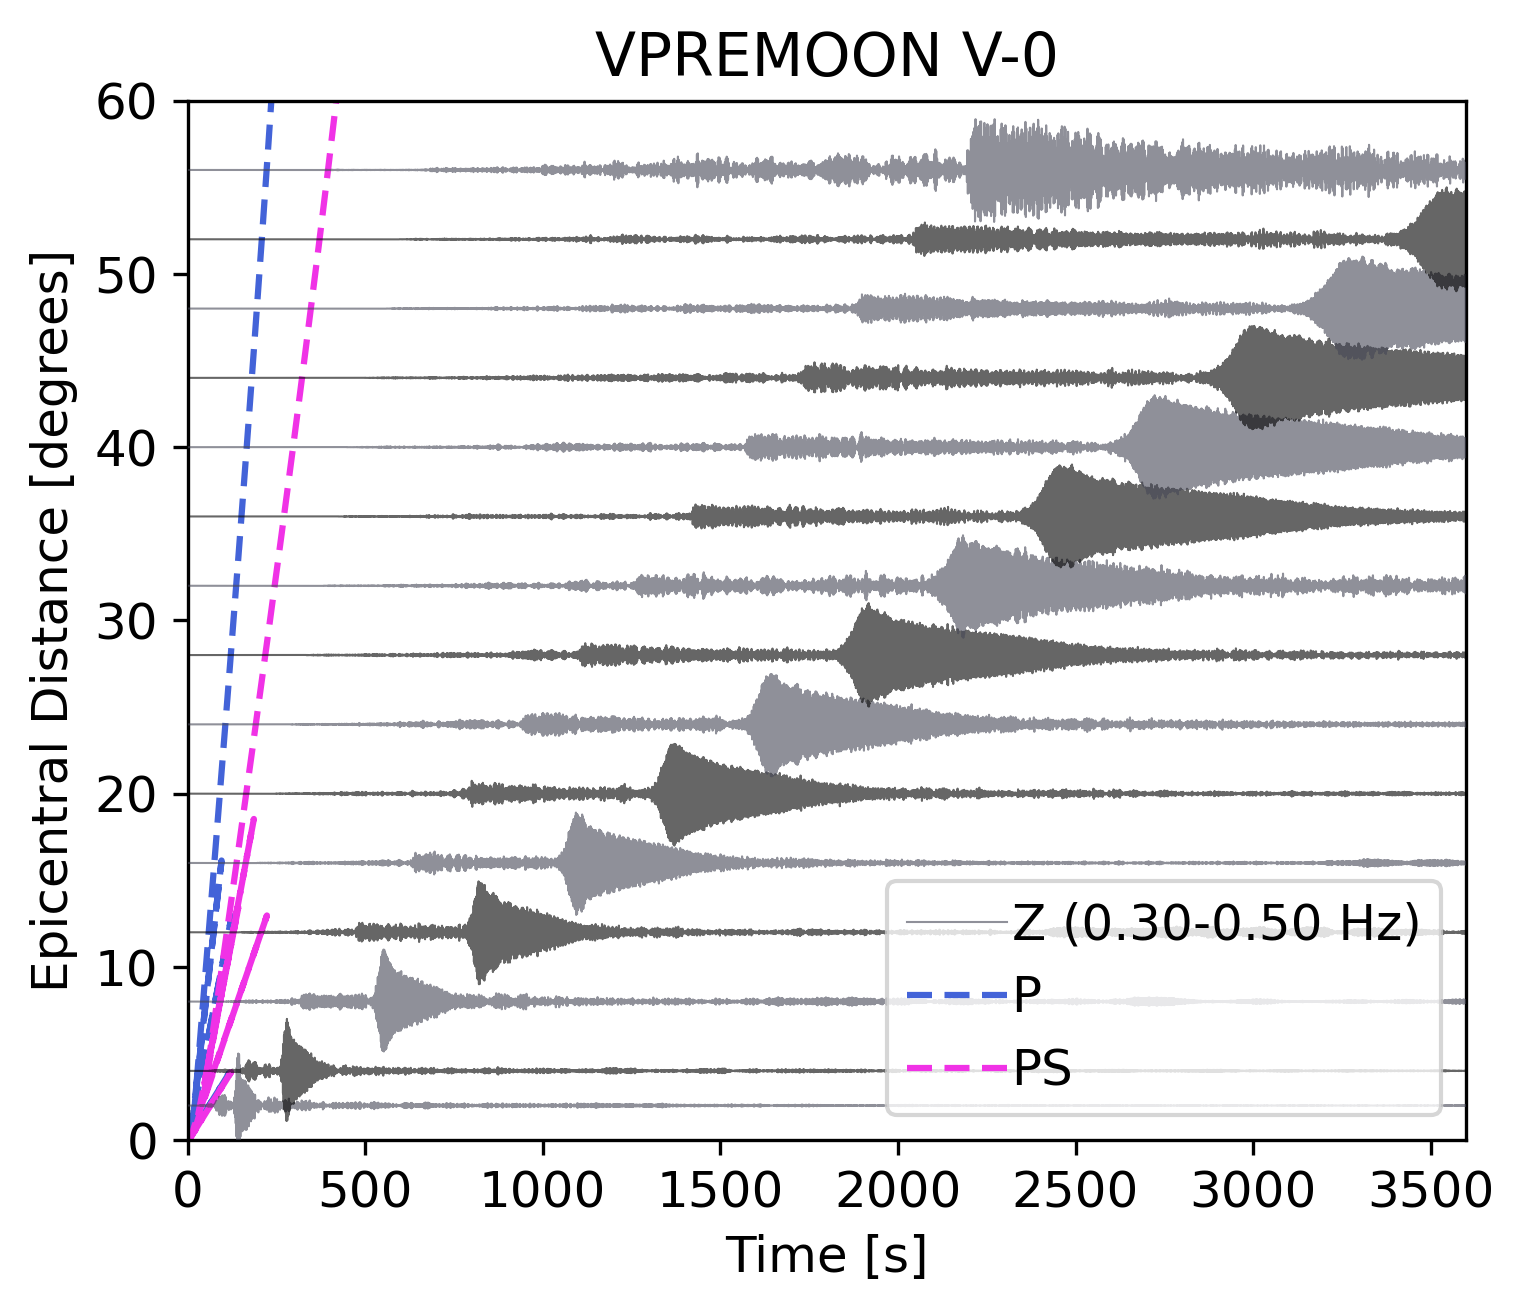

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L4..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L8..Z  | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L12..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L16..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L20..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L24..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L28..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L32..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L36..Z | 1970-01-01T00:00:00.067600Z - 1970-01-01T01:00:00.092080Z | 4.1 Hz, 14794 samples
LO.L40..Z | 1970-01-01T00:00:00.06760

In [6]:
############################################################################
# specify a run name  
run = '120_VPREMOON_atten_explosion_2'  
run_title = "VPREMOON, with attenuation, surface explosion"  
short_title = "VPREMOON V-0"  
# model for TauP  
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.875668Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9094 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.875668Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9094 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 127w_VPREMOON_atten_linear20_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


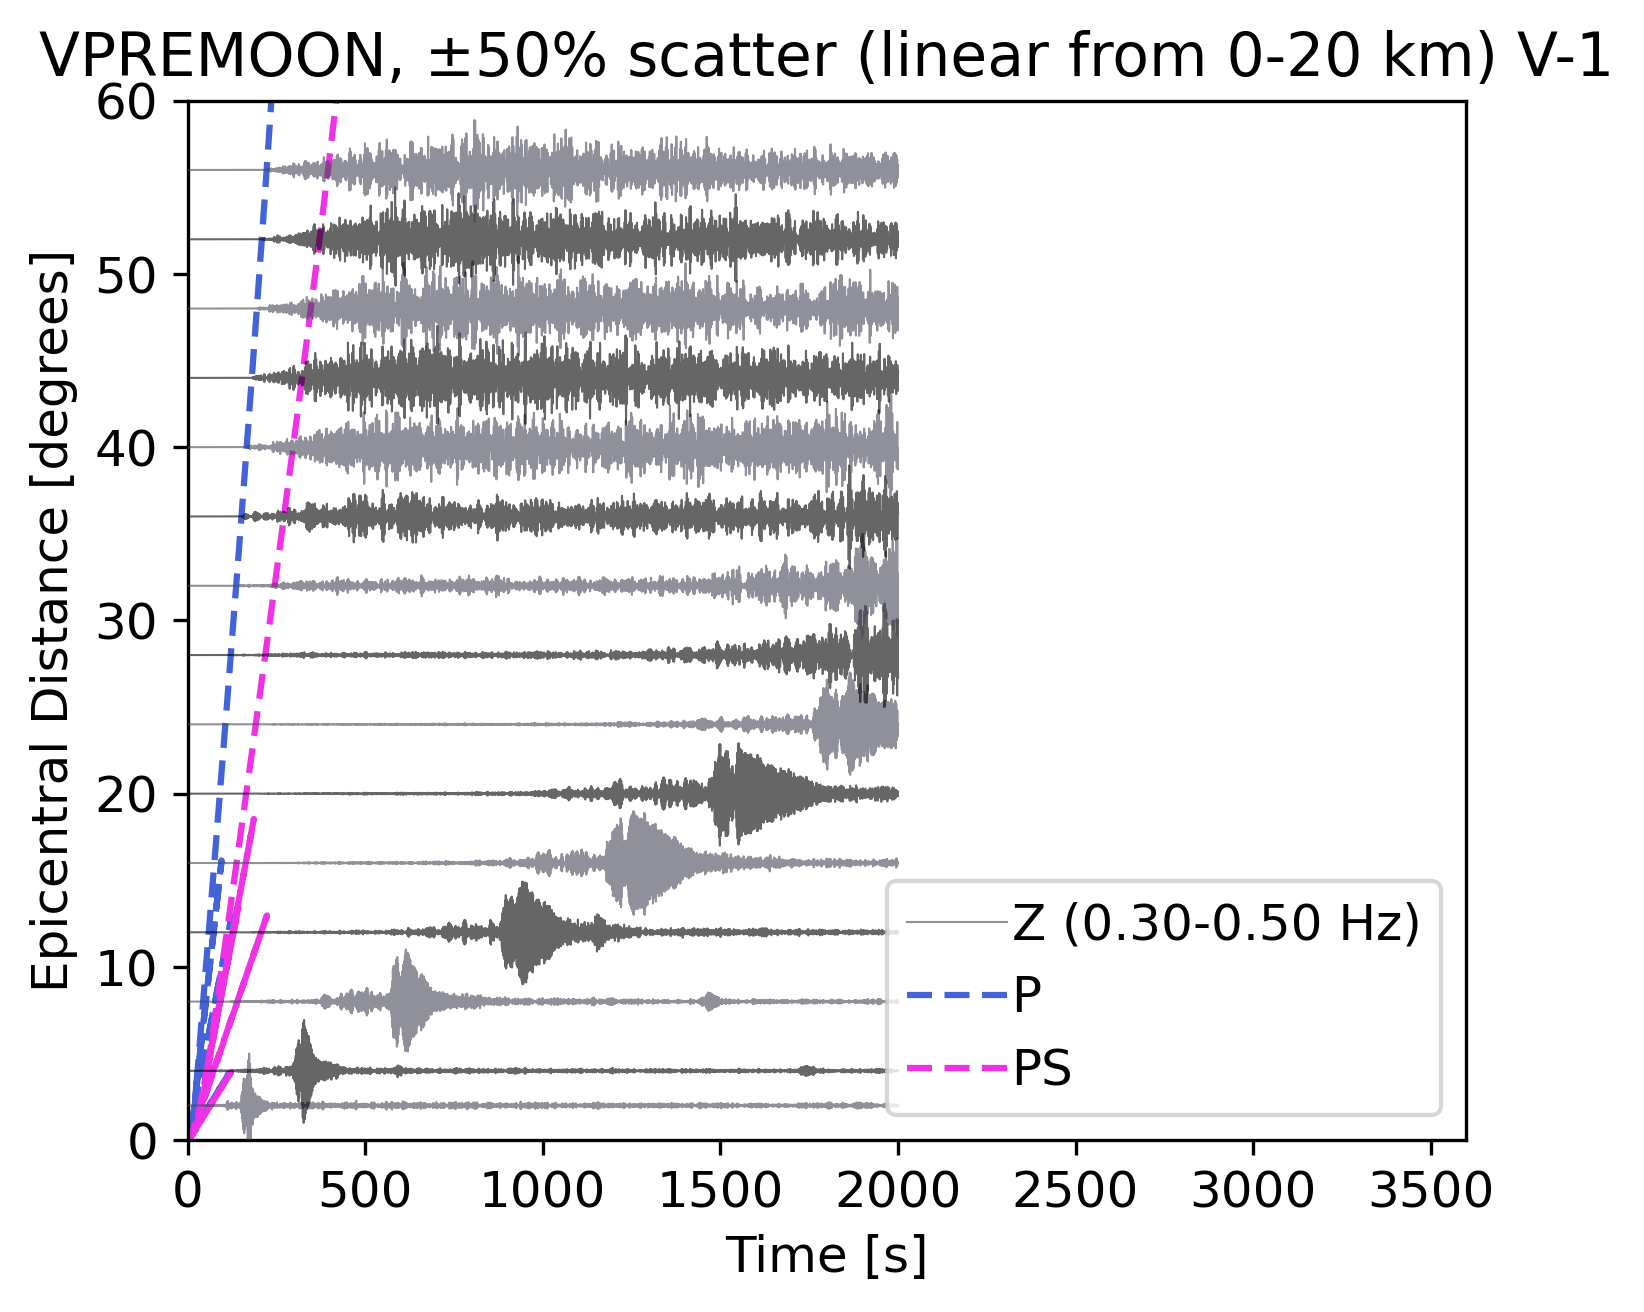

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L4..Z  | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L8..Z  | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L12..Z | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L16..Z | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L20..Z | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L24..Z | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L28..Z | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L32..Z | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L36..Z | 1970-01-01T00:00:00.095640Z - 1970-01-01T00:33:20.081064Z | 4.5 Hz, 9093 samples
LO.L40..Z | 1970-01-01T00:00:00.095640Z - 1970-

In [7]:
############################################################################
# specify a run name  
run = '127w_VPREMOON_atten_linear20_2'  
run_title = "VPREMOON, ±50% scatter linear from 0 to 20 km, surface explosion"  
short_title = "VPREMOON, ±50% scatter (linear from 0-20 km) V-1"  
# model for TauP  
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.874017Z - 1970-01-01T01:00:09.810281Z | 4.3 Hz, 15522 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.874017Z - 1970-01-01T01:00:09.810281Z | 4.3 Hz, 15522 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 126w_VPREMOON_atten_linear50_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


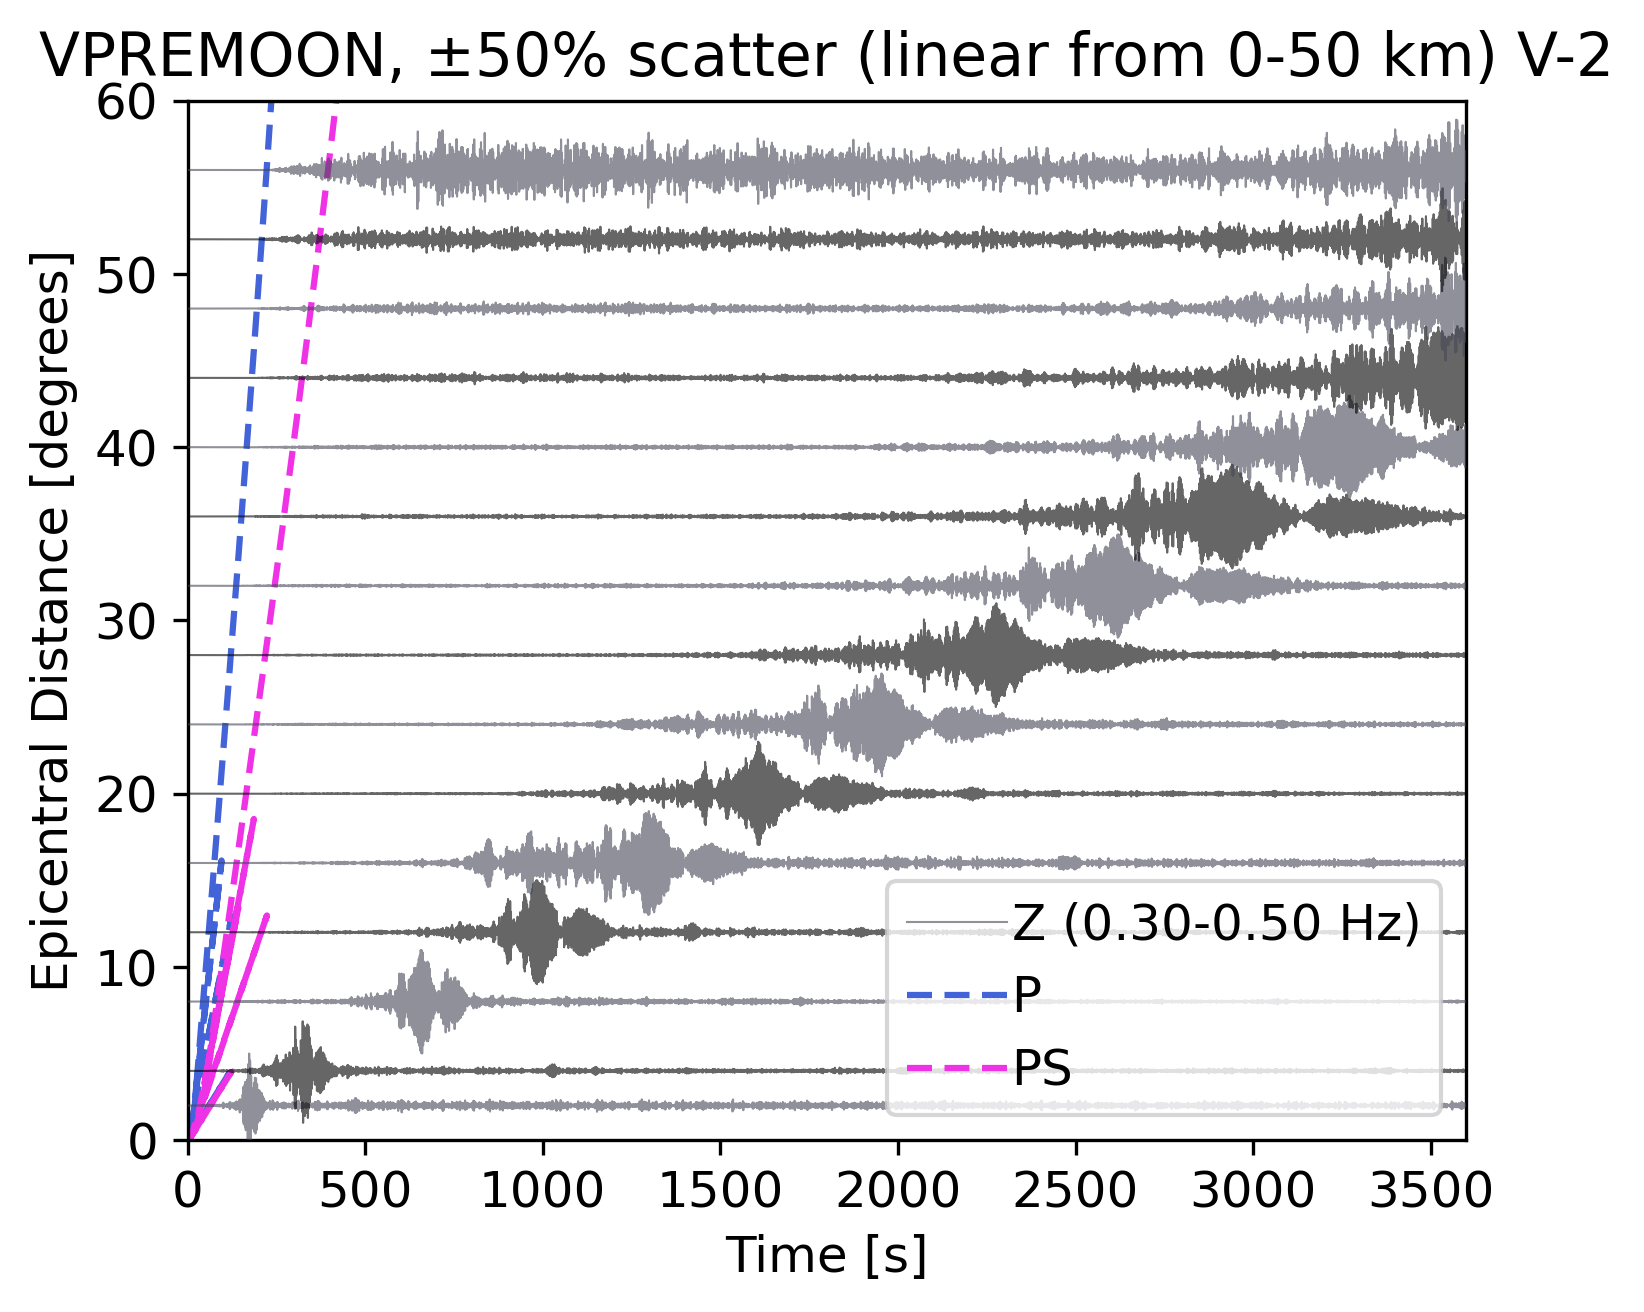

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L4..Z  | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L8..Z  | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L12..Z | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L16..Z | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L20..Z | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L24..Z | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L28..Z | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L32..Z | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L36..Z | 1970-01-01T00:00:00.106601Z - 1970-01-01T01:00:00.041753Z | 4.3 Hz, 15479 samples
LO.L40..Z | 1970-01-01T00:00:00.10660

In [8]:
############################################################################
# specify a run name  
run = '126w_VPREMOON_atten_linear50_2'  
run_title = "VPREMOON, ±50% scatter linear from 0 to 50 km, surface explosion"  
short_title = "VPREMOON, ±50% scatter (linear from 0-50 km) V-2"  
# model for TauP  
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.871781Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8818 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.871781Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8818 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 124w_VPREMOON_atten_linear80_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


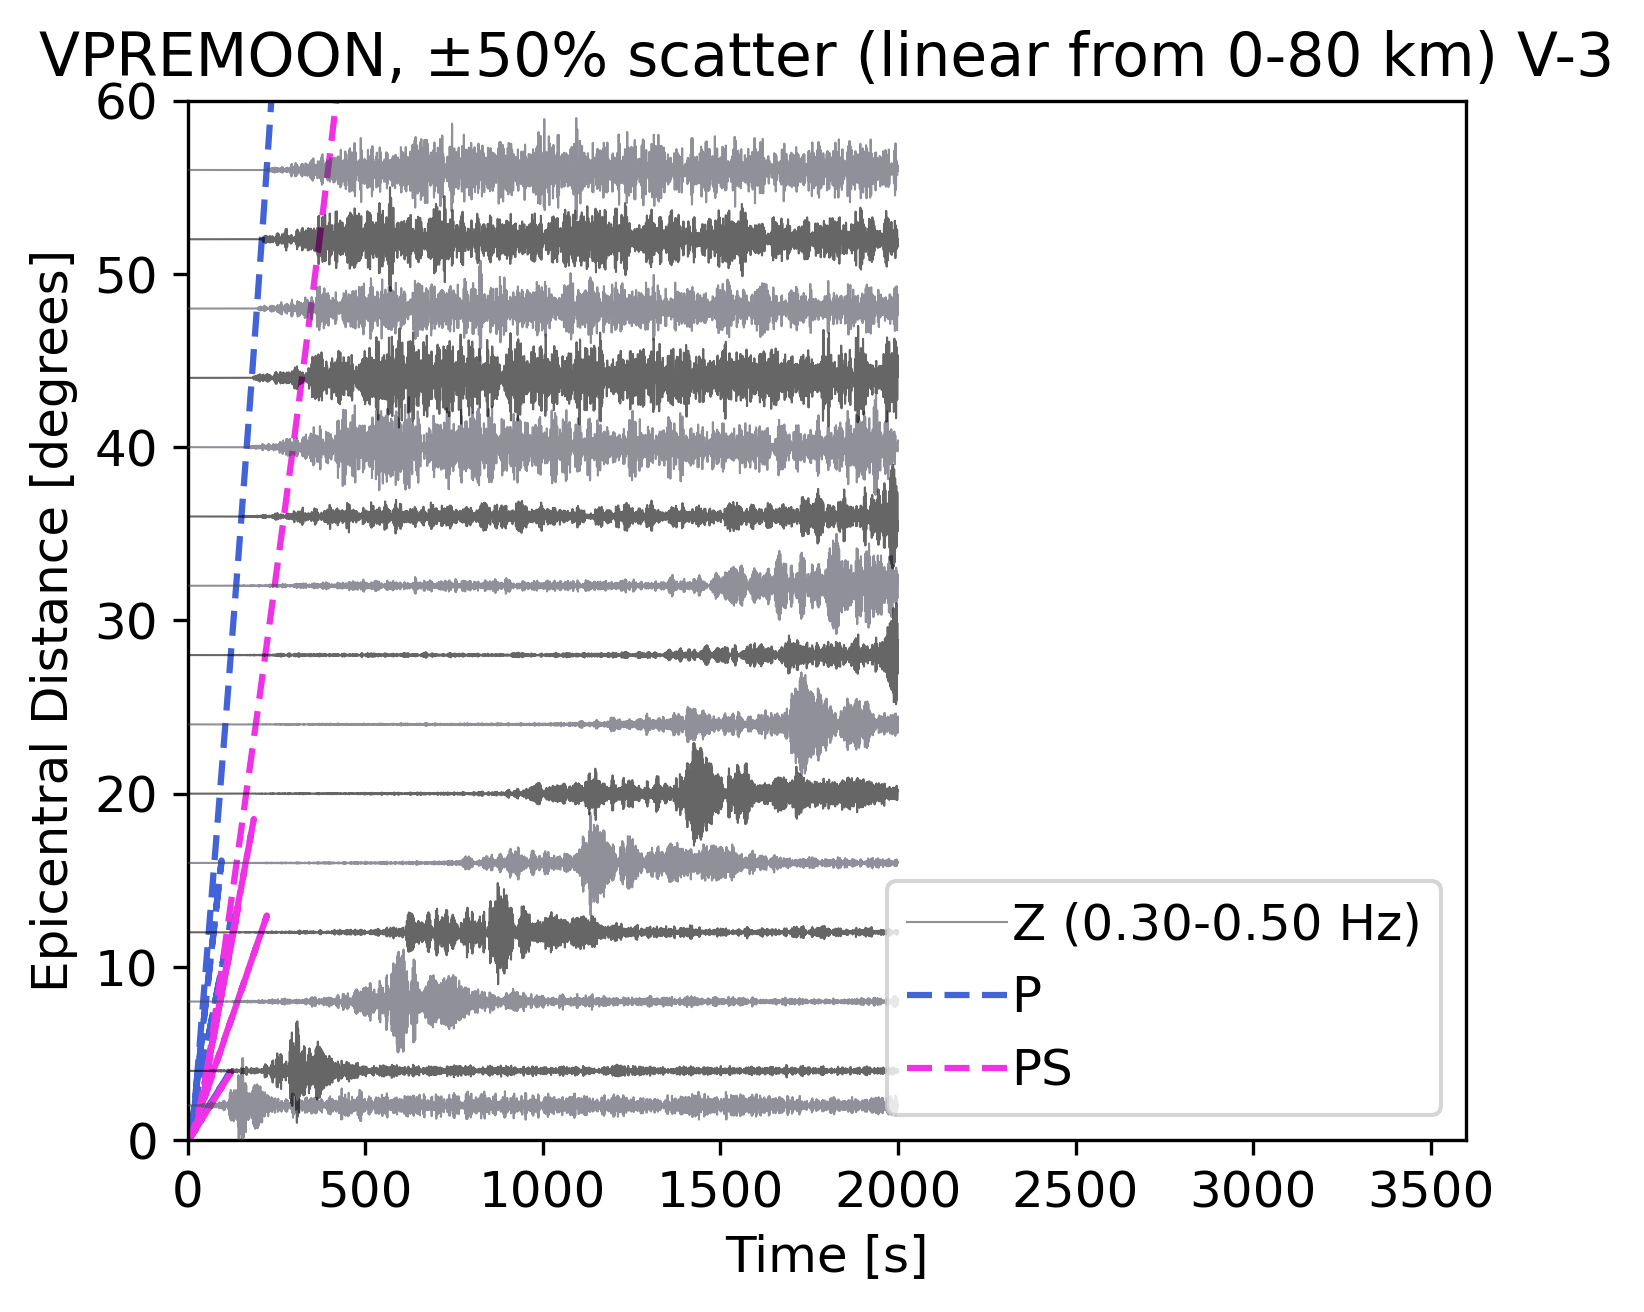

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L4..Z  | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L8..Z  | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L12..Z | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L16..Z | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L20..Z | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L24..Z | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L28..Z | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L32..Z | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L36..Z | 1970-01-01T00:00:00.098630Z - 1970-01-01T00:33:19.999414Z | 4.4 Hz, 8817 samples
LO.L40..Z | 1970-01-01T00:00:00.098630Z - 1970-

In [9]:
############################################################################
# specify a run name  
run = '124w_VPREMOON_atten_linear80_2'  
run_title = "VPREMOON, ±50% scatter linear from 0 to 80 km, surface explosion"  
short_title = "VPREMOON, ±50% scatter (linear from 0-80 km) V-3"  
# model for TauP  
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 128b_VPREMOON_atten_surface_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


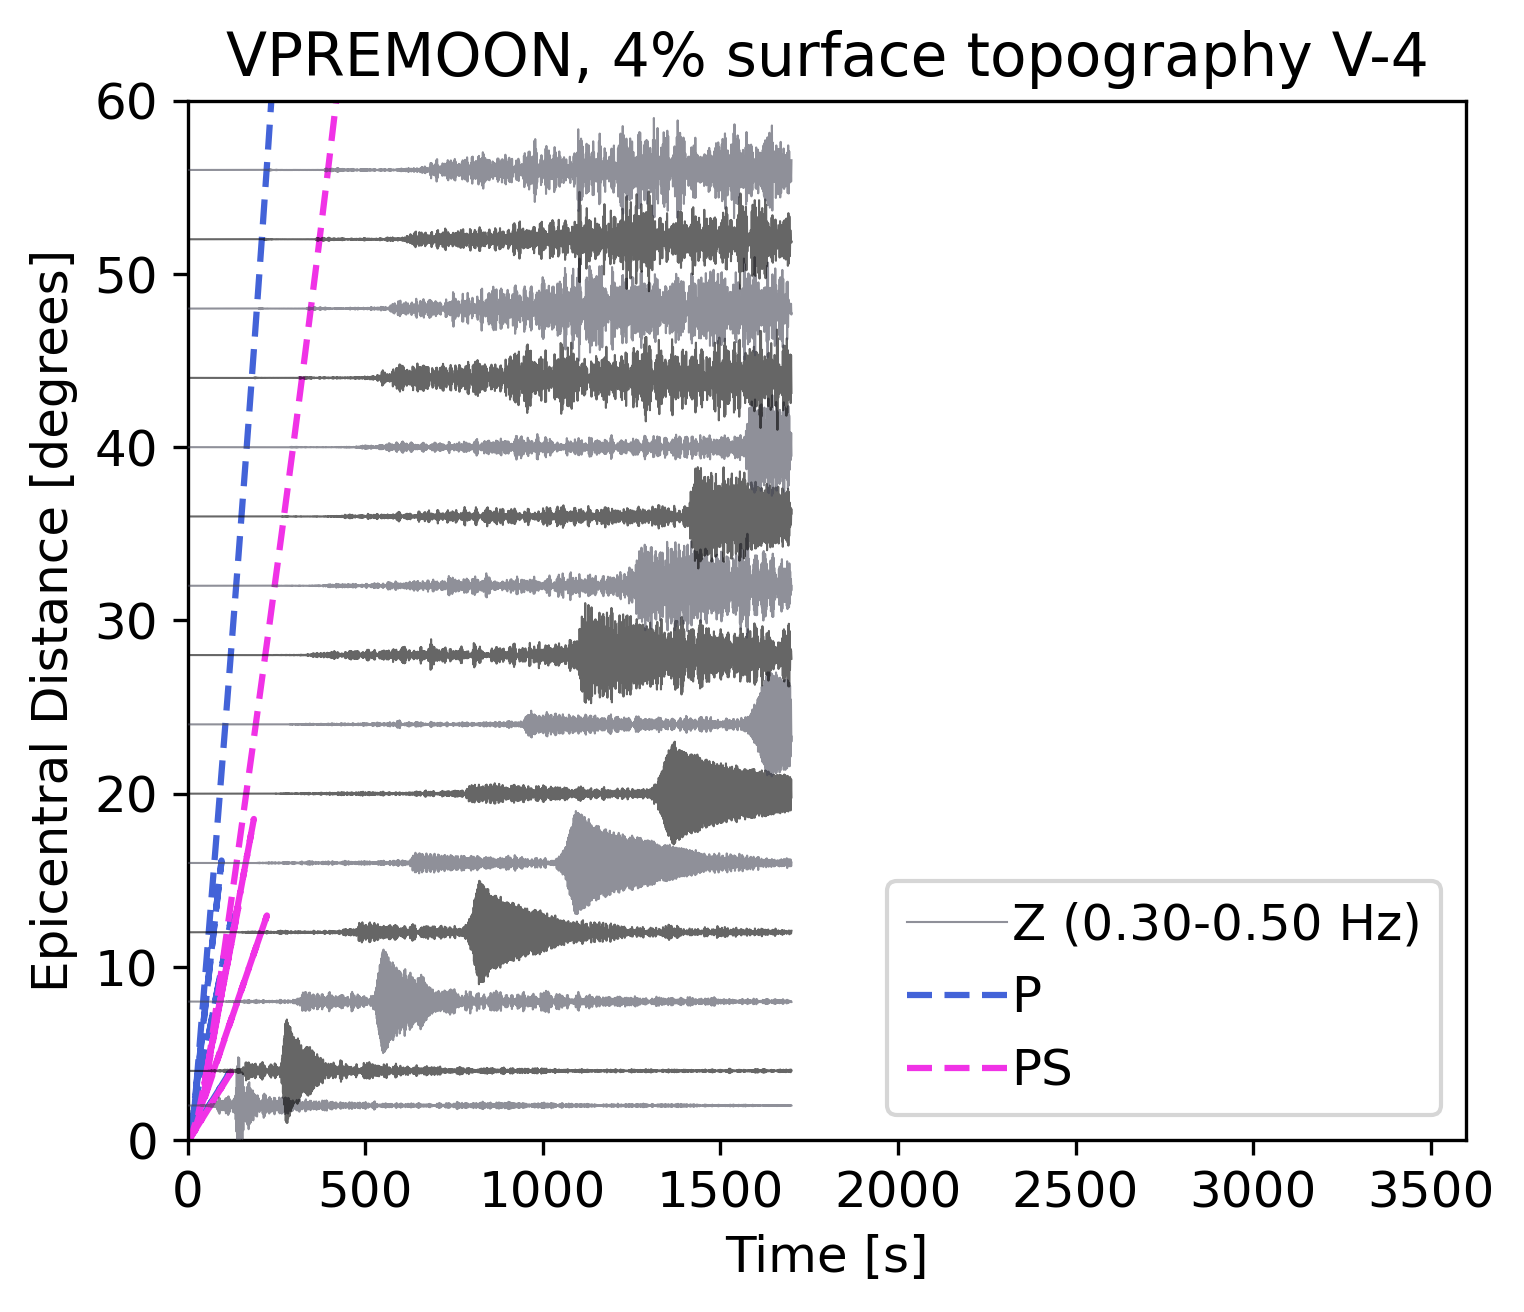

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L4..Z  | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L8..Z  | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L12..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L16..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L20..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L24..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L28..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L32..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L36..Z | 1969-12-31T23:59:59.954734Z - 1970-01-01T00:28:20.100428Z | 4.0 Hz, 6878 samples
LO.L40..Z | 1969-12-31T23:59:59.954734Z - 1970-

In [10]:
############################################################################
# specify a run name  
run = '128b_VPREMOON_atten_surface_2'  
run_title = "VPREMOON, 4% surface topography, surface explosion"  
short_title = 'VPREMOON, 4% surface topography V-4'  
# model for TauP  
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:09.943482Z | 4.1 Hz, 14627 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:09.943482Z | 4.1 Hz, 14627 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 125_VPREMOON_atten_Moho_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


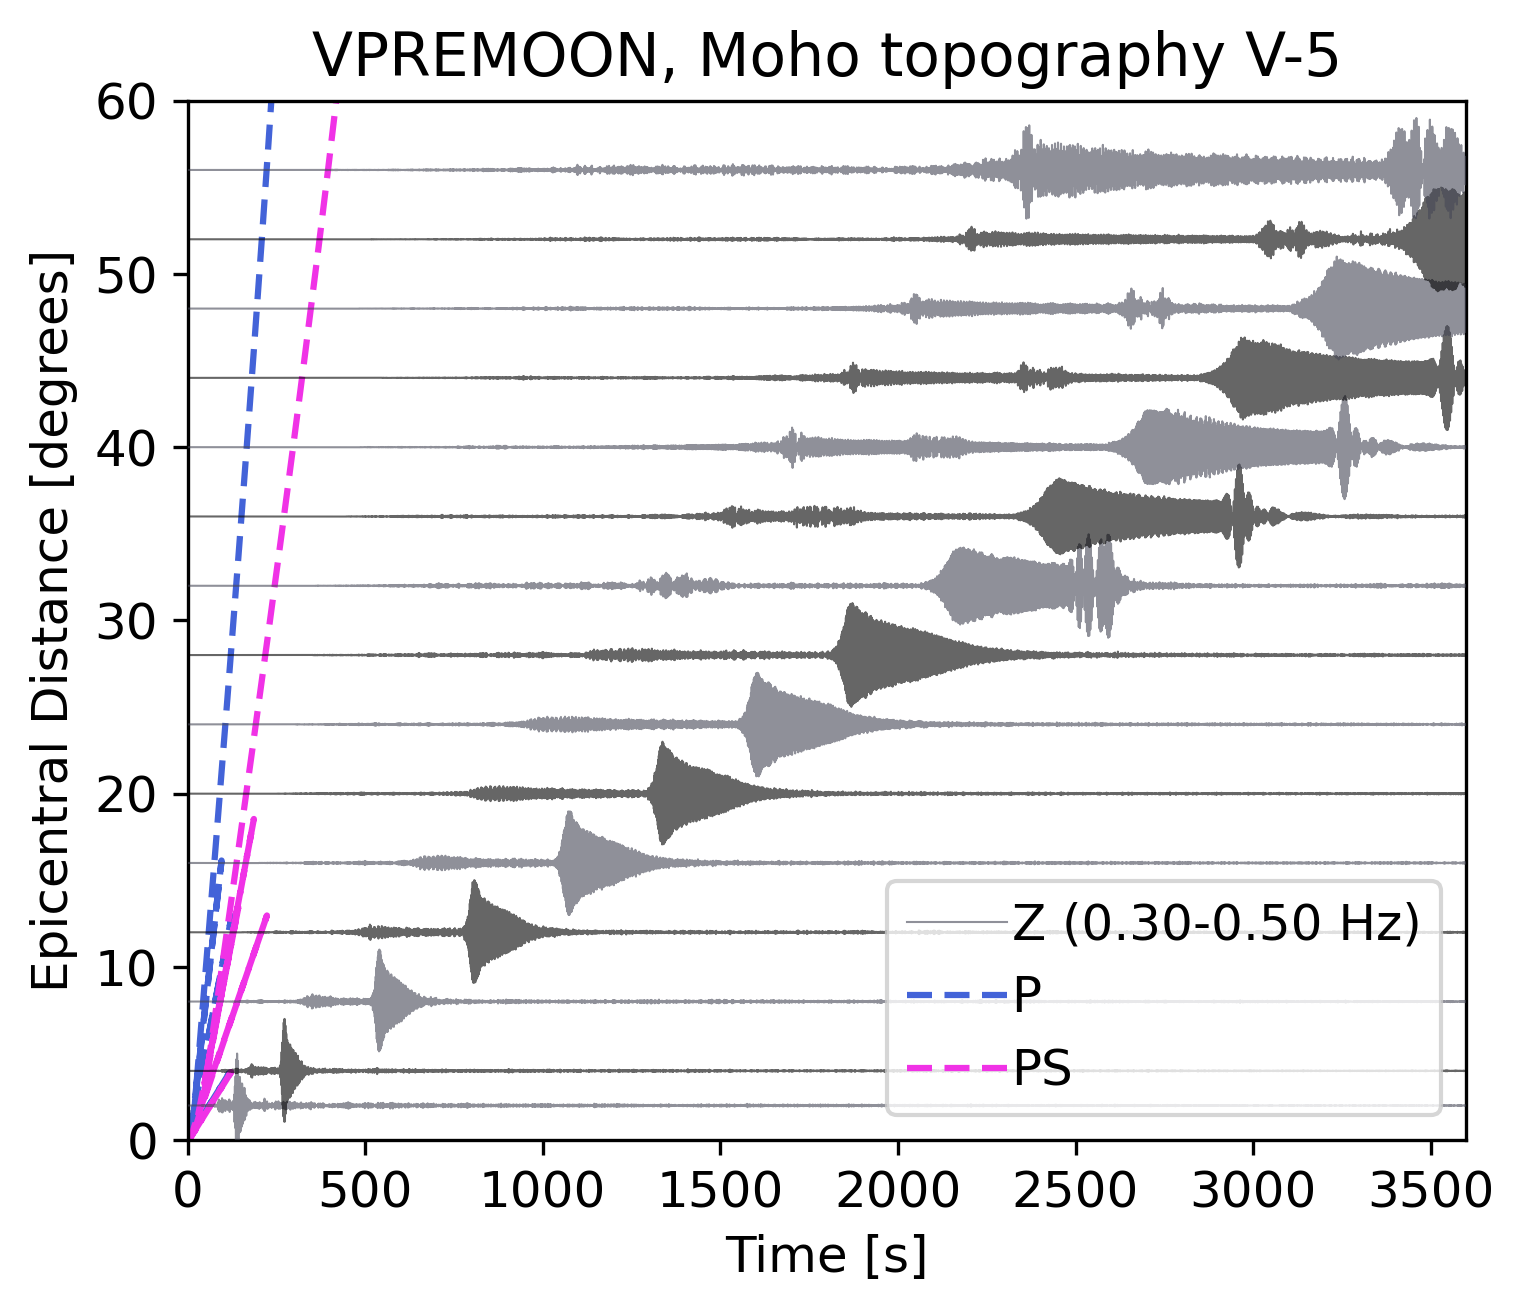

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L4..Z  | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L8..Z  | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L12..Z | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L16..Z | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L20..Z | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L24..Z | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L28..Z | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L32..Z | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L36..Z | 1969-12-31T23:59:59.954162Z - 1970-01-01T01:00:00.070682Z | 4.1 Hz, 14587 samples
LO.L40..Z | 1969-12-31T23:59:59.95416

In [11]:
############################################################################
# specify a run name  
run = '125_VPREMOON_atten_Moho_2'  
run_title = "VPREMOON, Moho topography from Wieczorek et al., 2013, surface explosion"  
short_title = "VPREMOON, Moho topography V-5"  
# model for TauP  
model_taup='VPREMOON_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:09.975347Z | 4.0 Hz, 14505 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:09.975347Z | 4.0 Hz, 14505 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 152we_VPREMOON_atten_combi_50_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


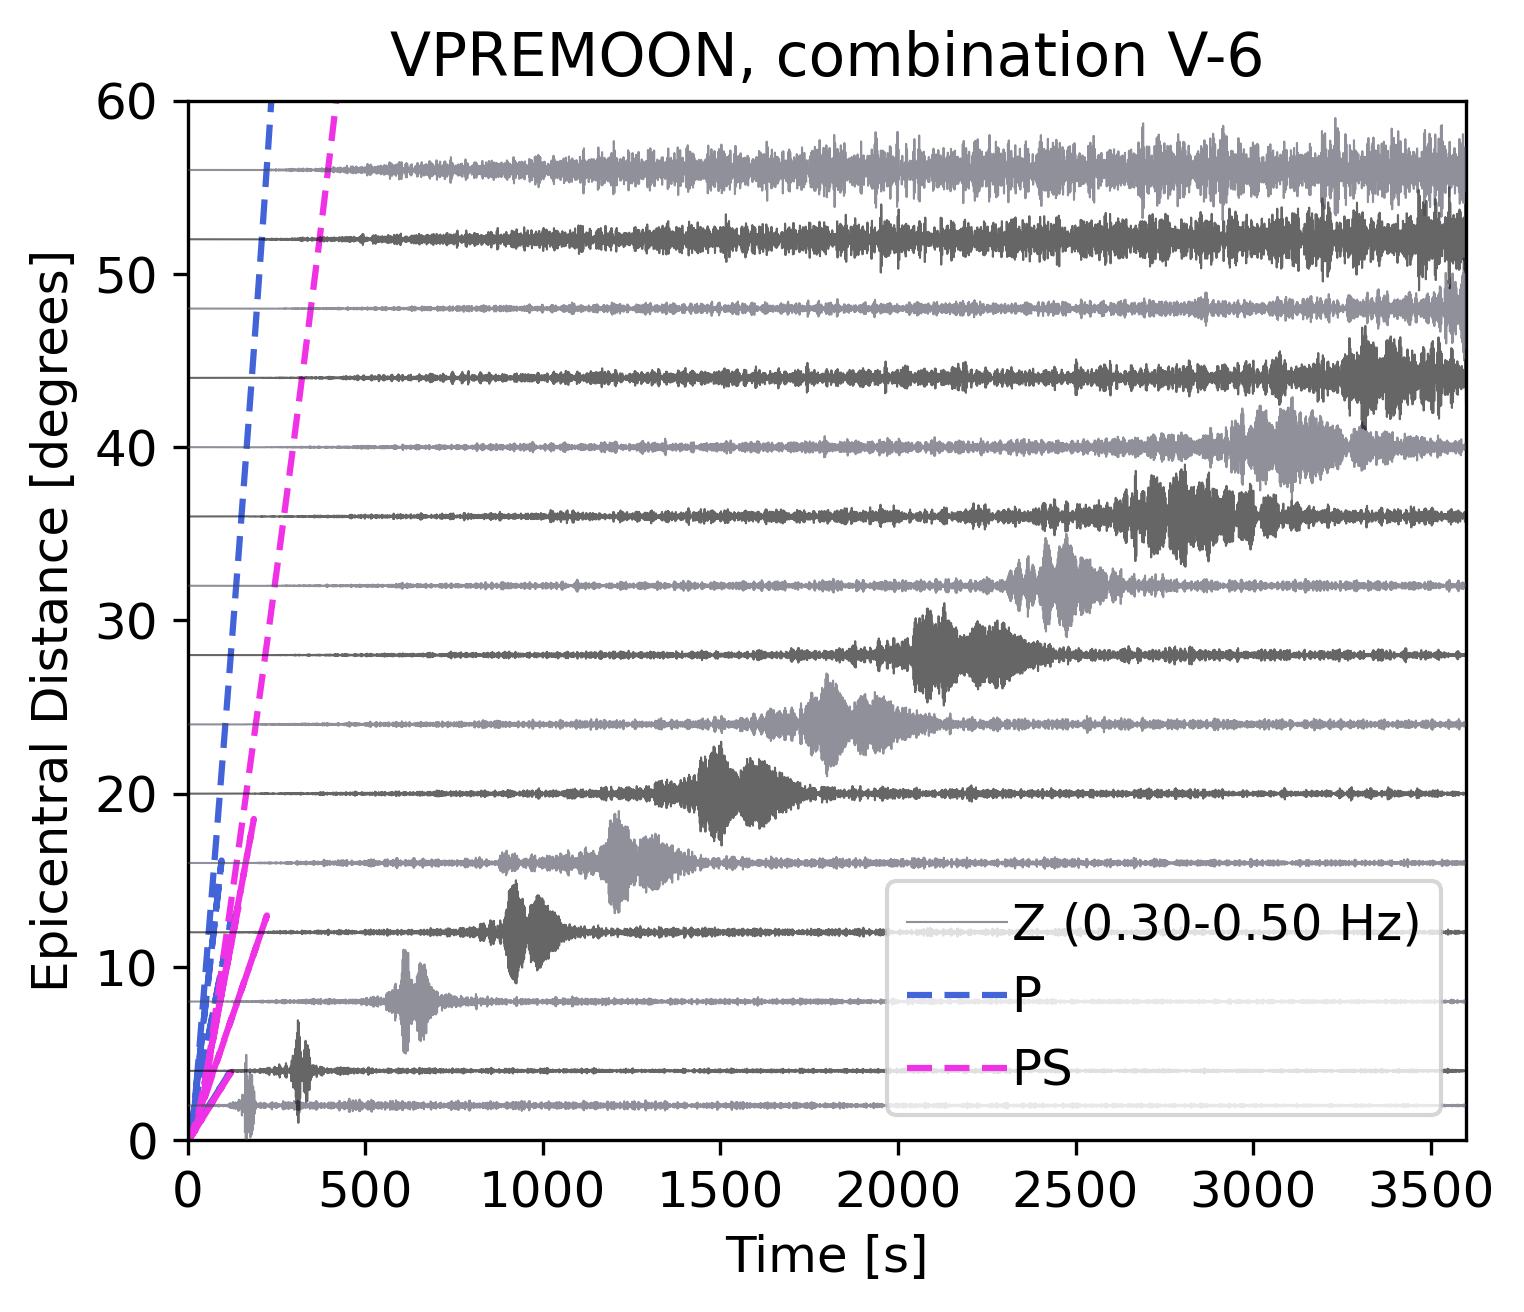

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L4..Z  | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L8..Z  | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L12..Z | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L16..Z | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L20..Z | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L24..Z | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L28..Z | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L32..Z | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L36..Z | 1969-12-31T23:59:59.973259Z - 1970-01-01T01:00:00.019467Z | 4.0 Hz, 14465 samples
LO.L40..Z | 1969-12-31T23:59:59.97325

In [12]:
############################################################################
# specify a run name  
run = '152we_VPREMOON_atten_combi_50_2'  
run_title = "VPREMOON, 4% surface topopgraphy, 100% Moho topography, ±50% scatter linear from 0 to 50 km, surface explosion"  
short_title = 'VPREMOON, combination V-6'  
# model for TauP  
model_taup='VPREMOON_taup'  
# unstable after 2900 s

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

30
Z
30 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(28 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 141_ISSI_atten_explosion_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


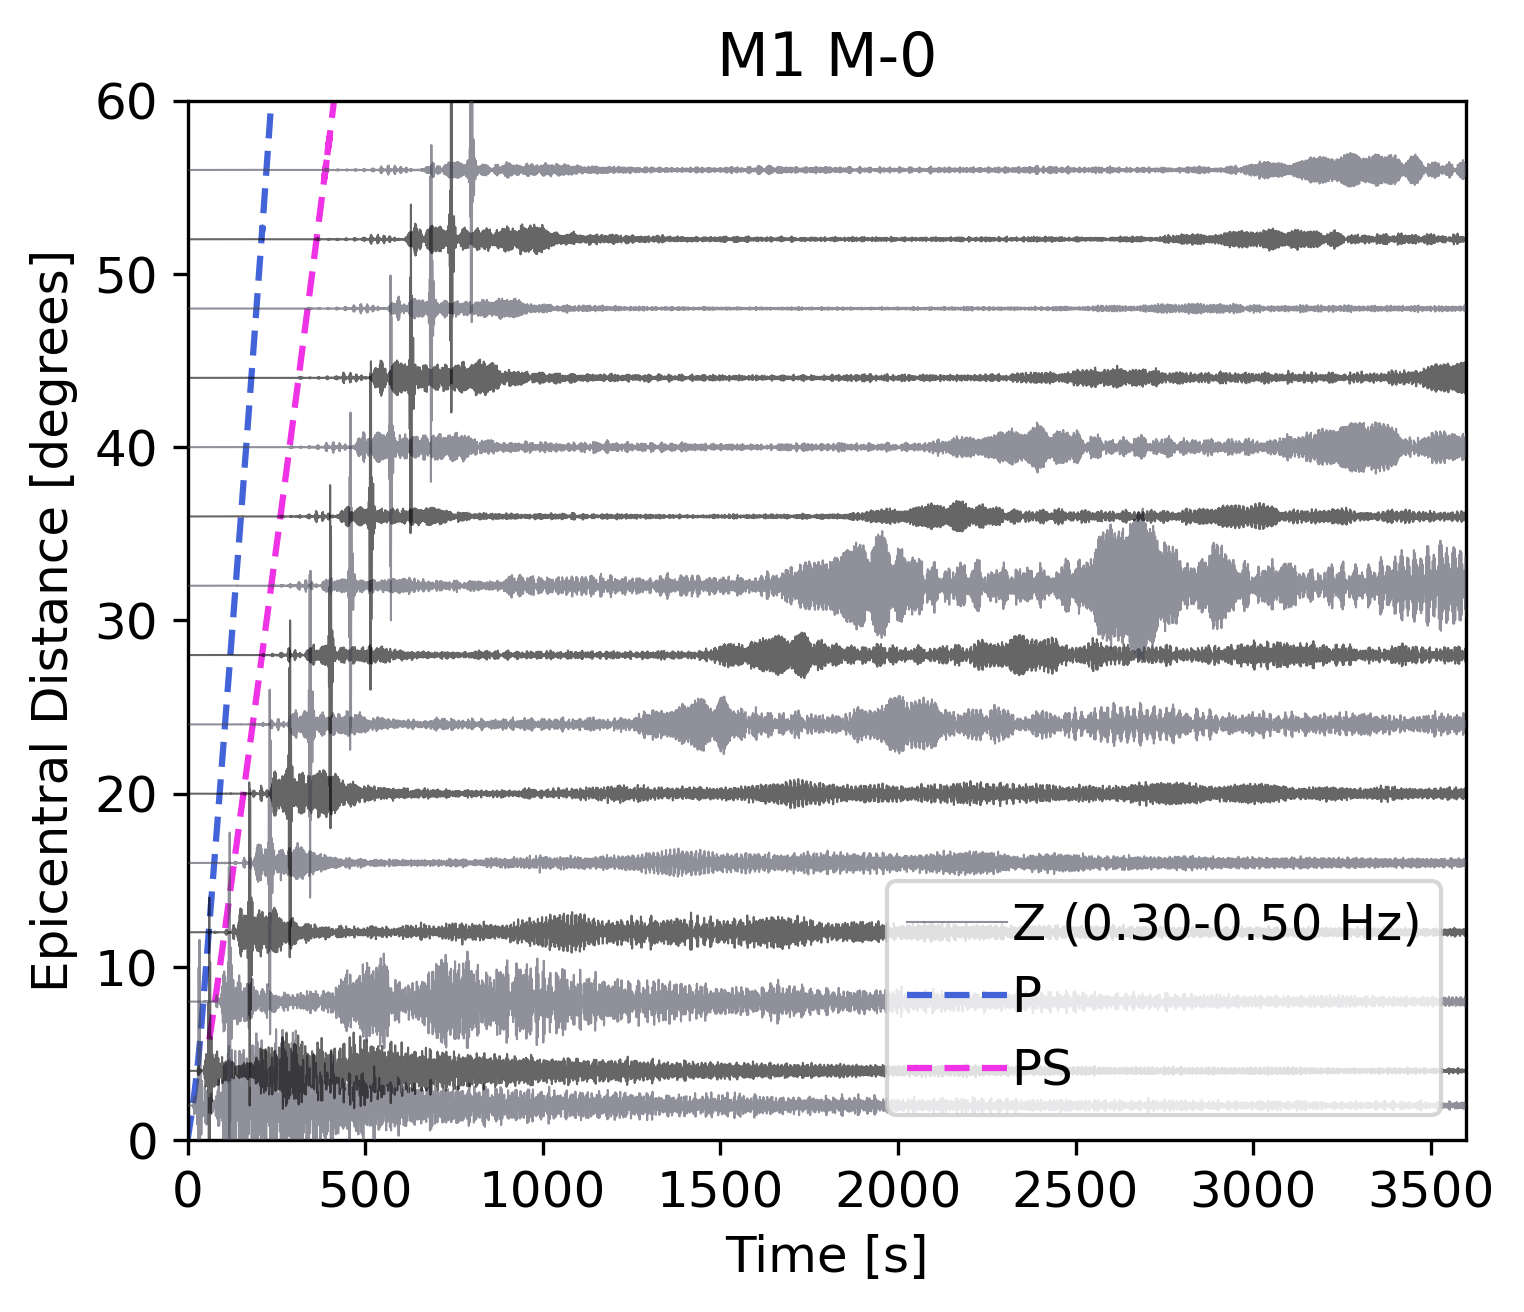

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L40..Z | 1970-01-01T00:00:00.09400

In [24]:
############################################################################
# specify a run name  
run = '141_ISSI_atten_explosion_2'  
run_title = "ISSI M1, with attenuation, surface explosion"  
short_title = "M1 M-0"  
# model for TauP  
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=10,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 146we_ISSI_atten_linear20_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


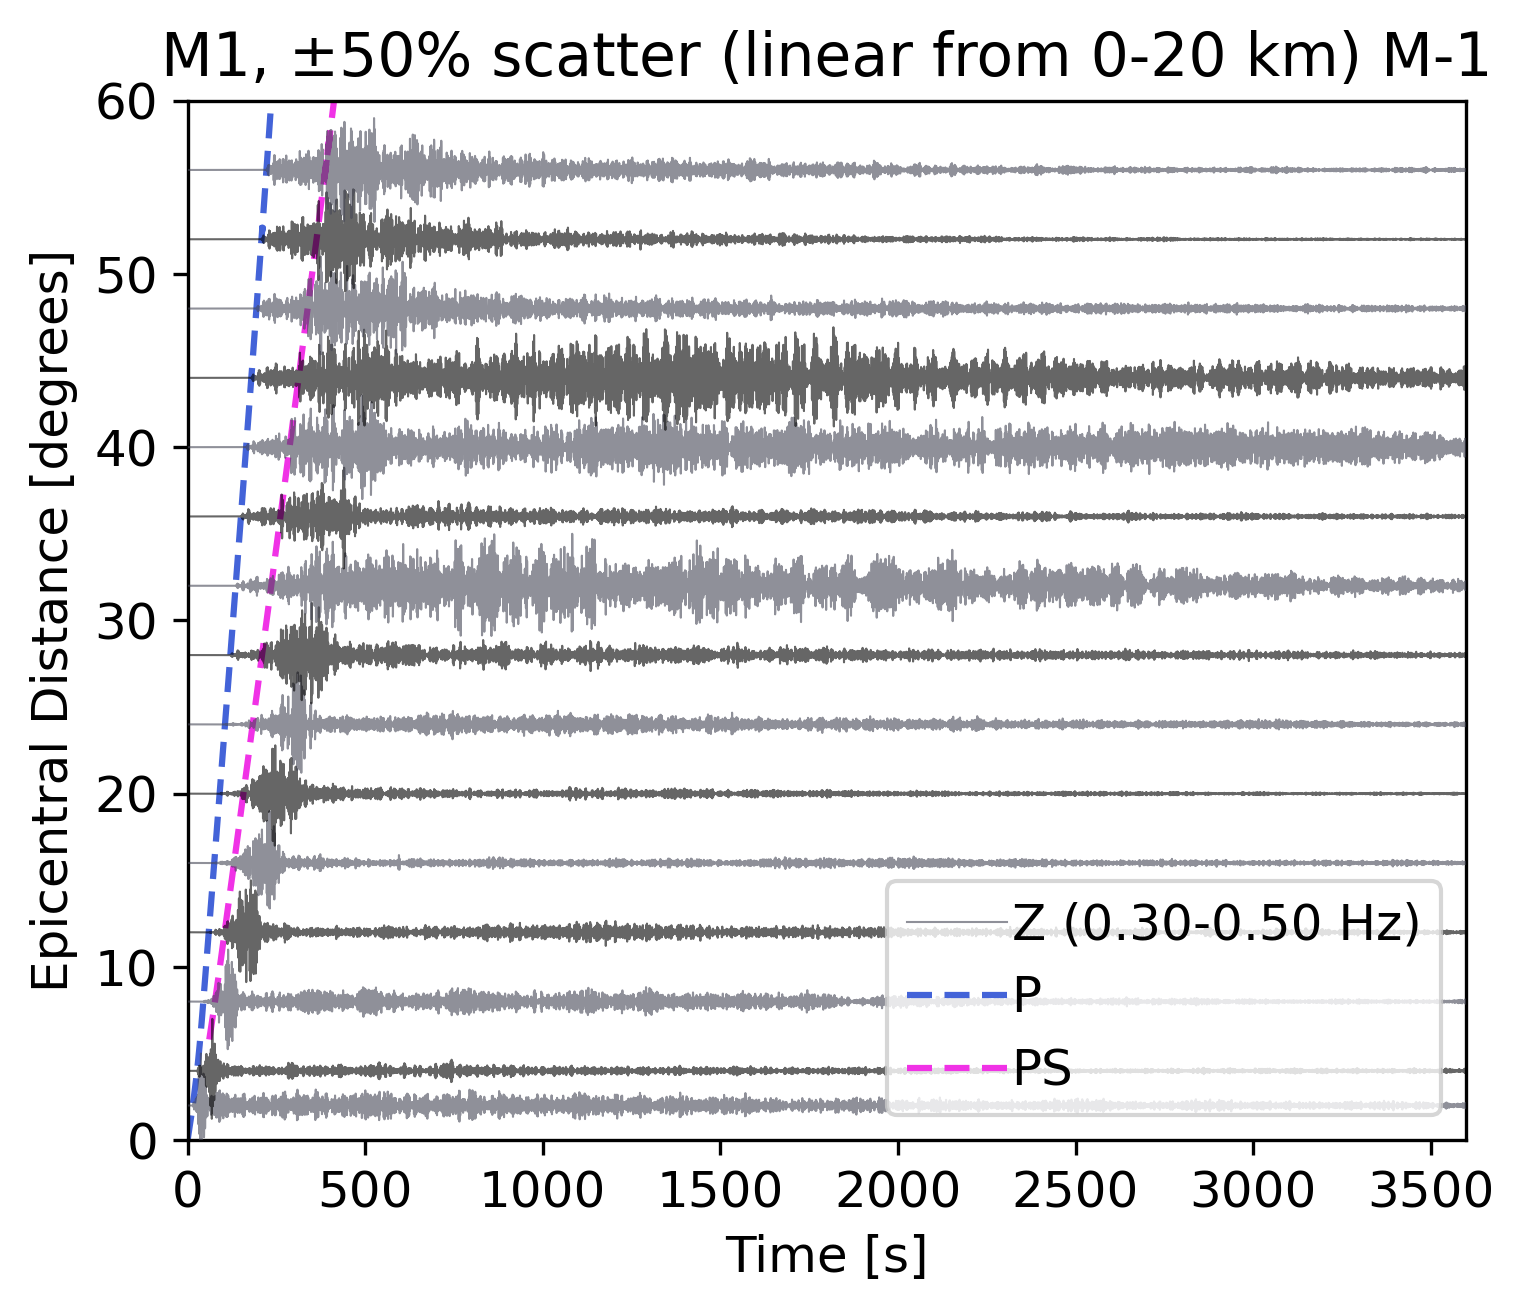

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L40..Z | 1970-01-01T00:00:00.09400

In [14]:
############################################################################
# specify a run name  
run = '146we_ISSI_atten_linear20_2'  
run_title = "ISSI M1, ±50% scatter linear from 0 to 20 km, surface explosion"  
short_title = "M1, ±50% scatter (linear from 0-20 km) M-1"  
# model for TauP  
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 145we_ISSI_atten_linear50_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


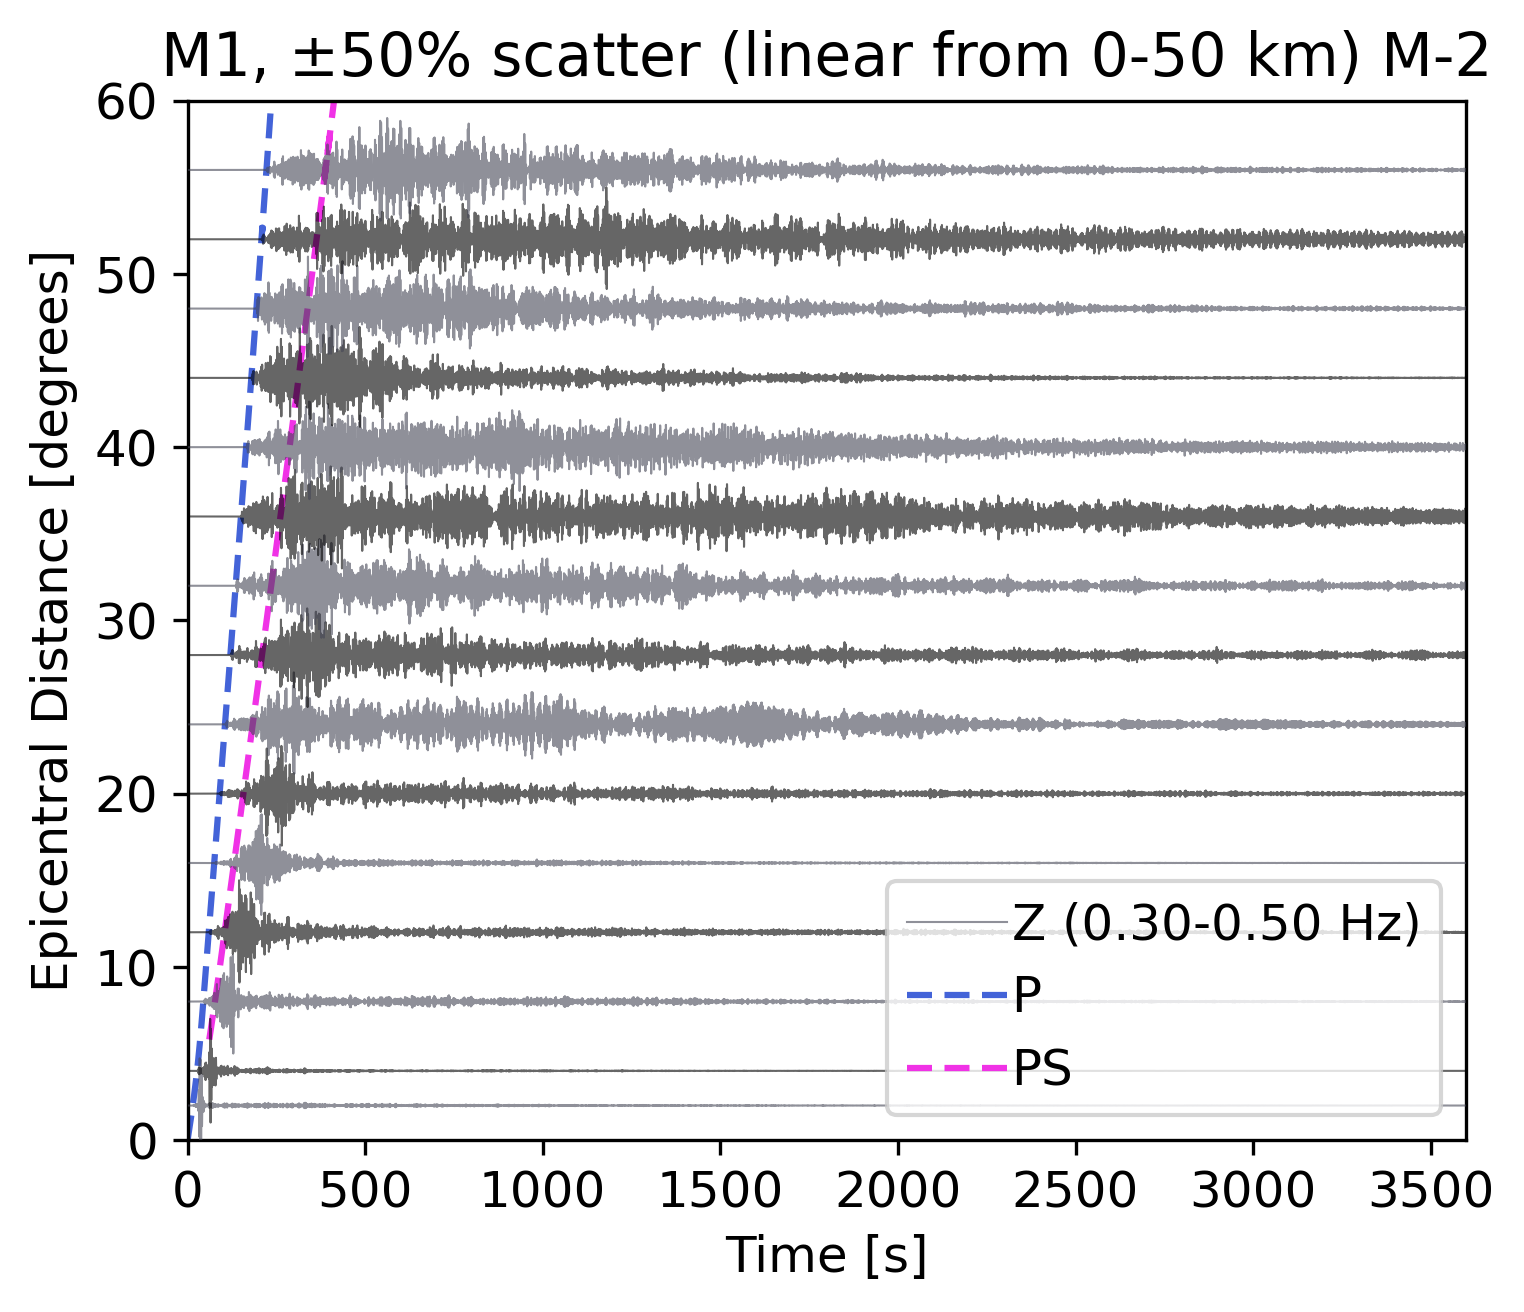

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L40..Z | 1970-01-01T00:00:00.09400

In [15]:
############################################################################
# specify a run name  
run = '145we_ISSI_atten_linear50_2'  
run_title = "ISSI M1, ±50% scatter linear from 0 to 50 km, surface explosion"  
short_title = "M1, ±50% scatter (linear from 0-50 km) M-2"  
# model for TauP  
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T01:00:09.799750Z | 4.1 Hz, 14631 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 140we_ISSI_atten_linear80_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


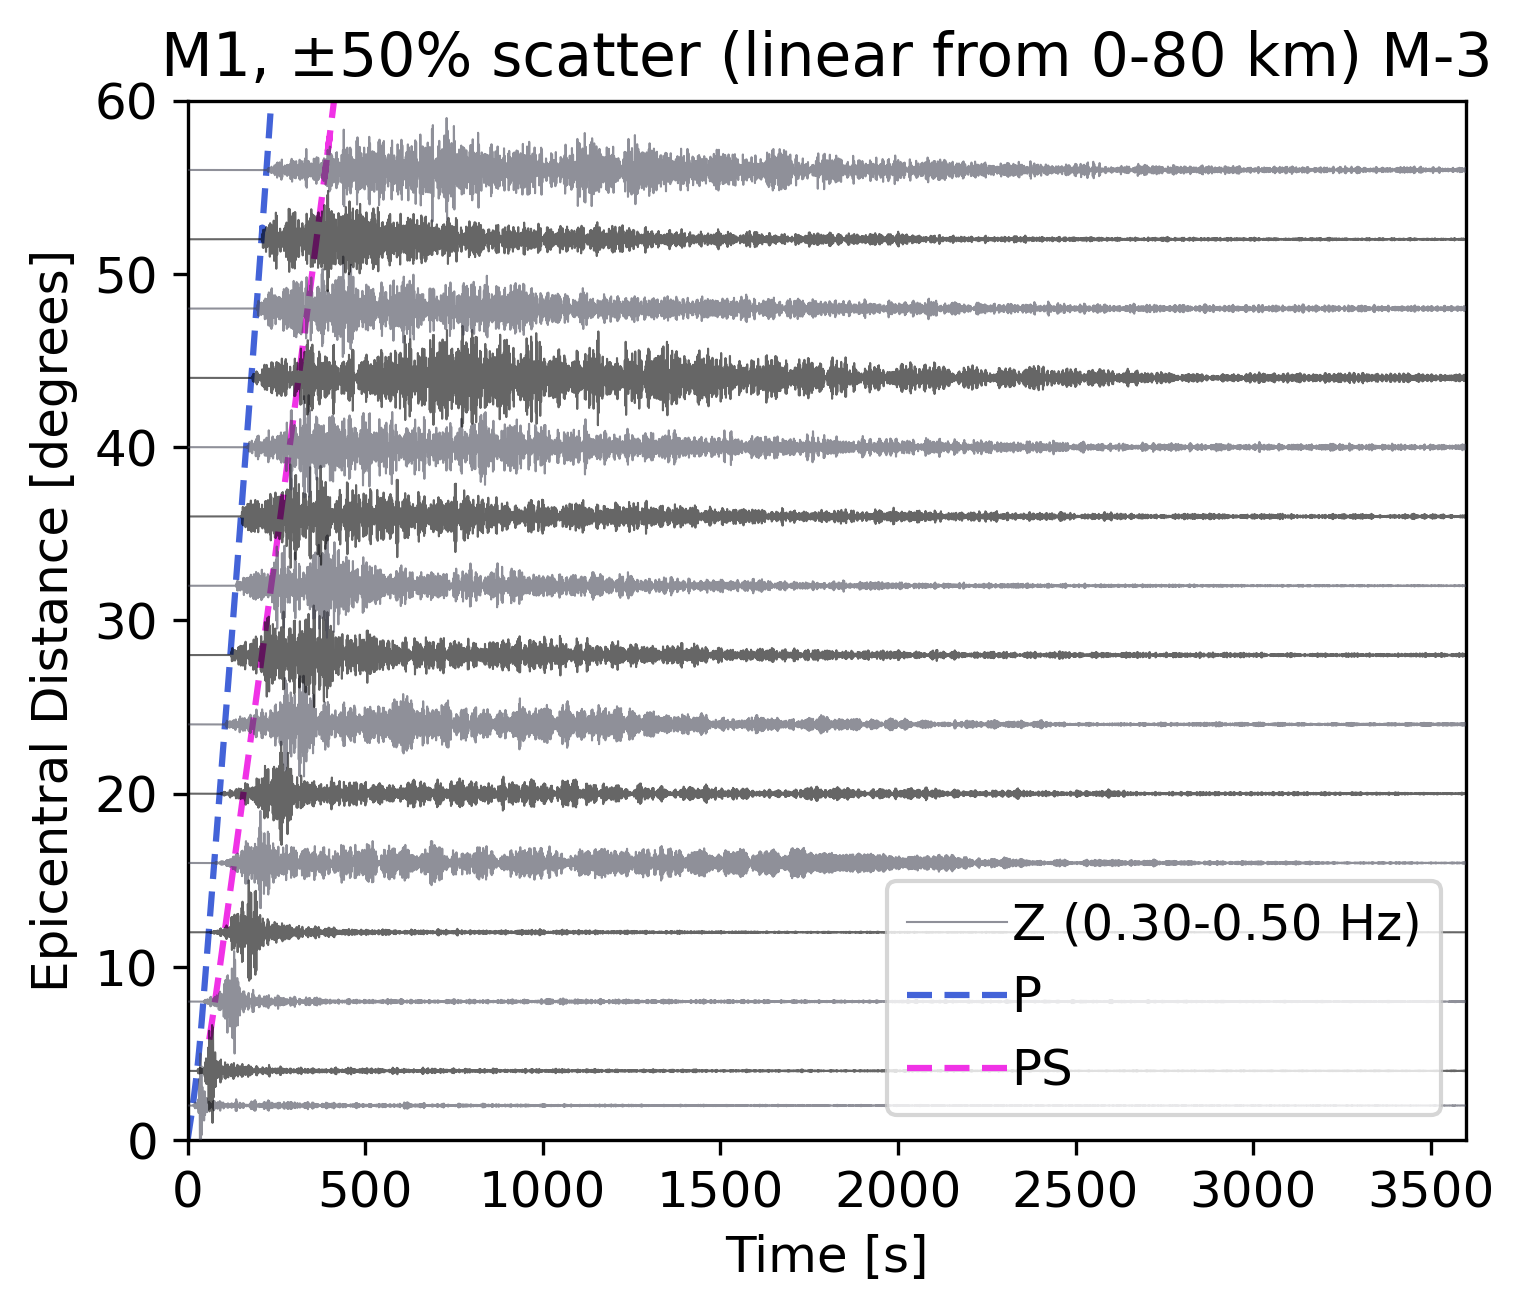

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:59:59.929750Z | 4.1 Hz, 14590 samples
LO.L40..Z | 1970-01-01T00:00:00.09400

In [16]:
############################################################################
# specify a run name  
run = '140we_ISSI_atten_linear80_2'  
run_title = "ISSI M1, ±50% scatter linear from 0 to 80 km, surface explosion"  
short_title = "M1, ±50% scatter (linear from 0-80 km) M-3"  
# model for TauP  
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.847250Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7702 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.847250Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7702 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 148_ISSI_atten_surface_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


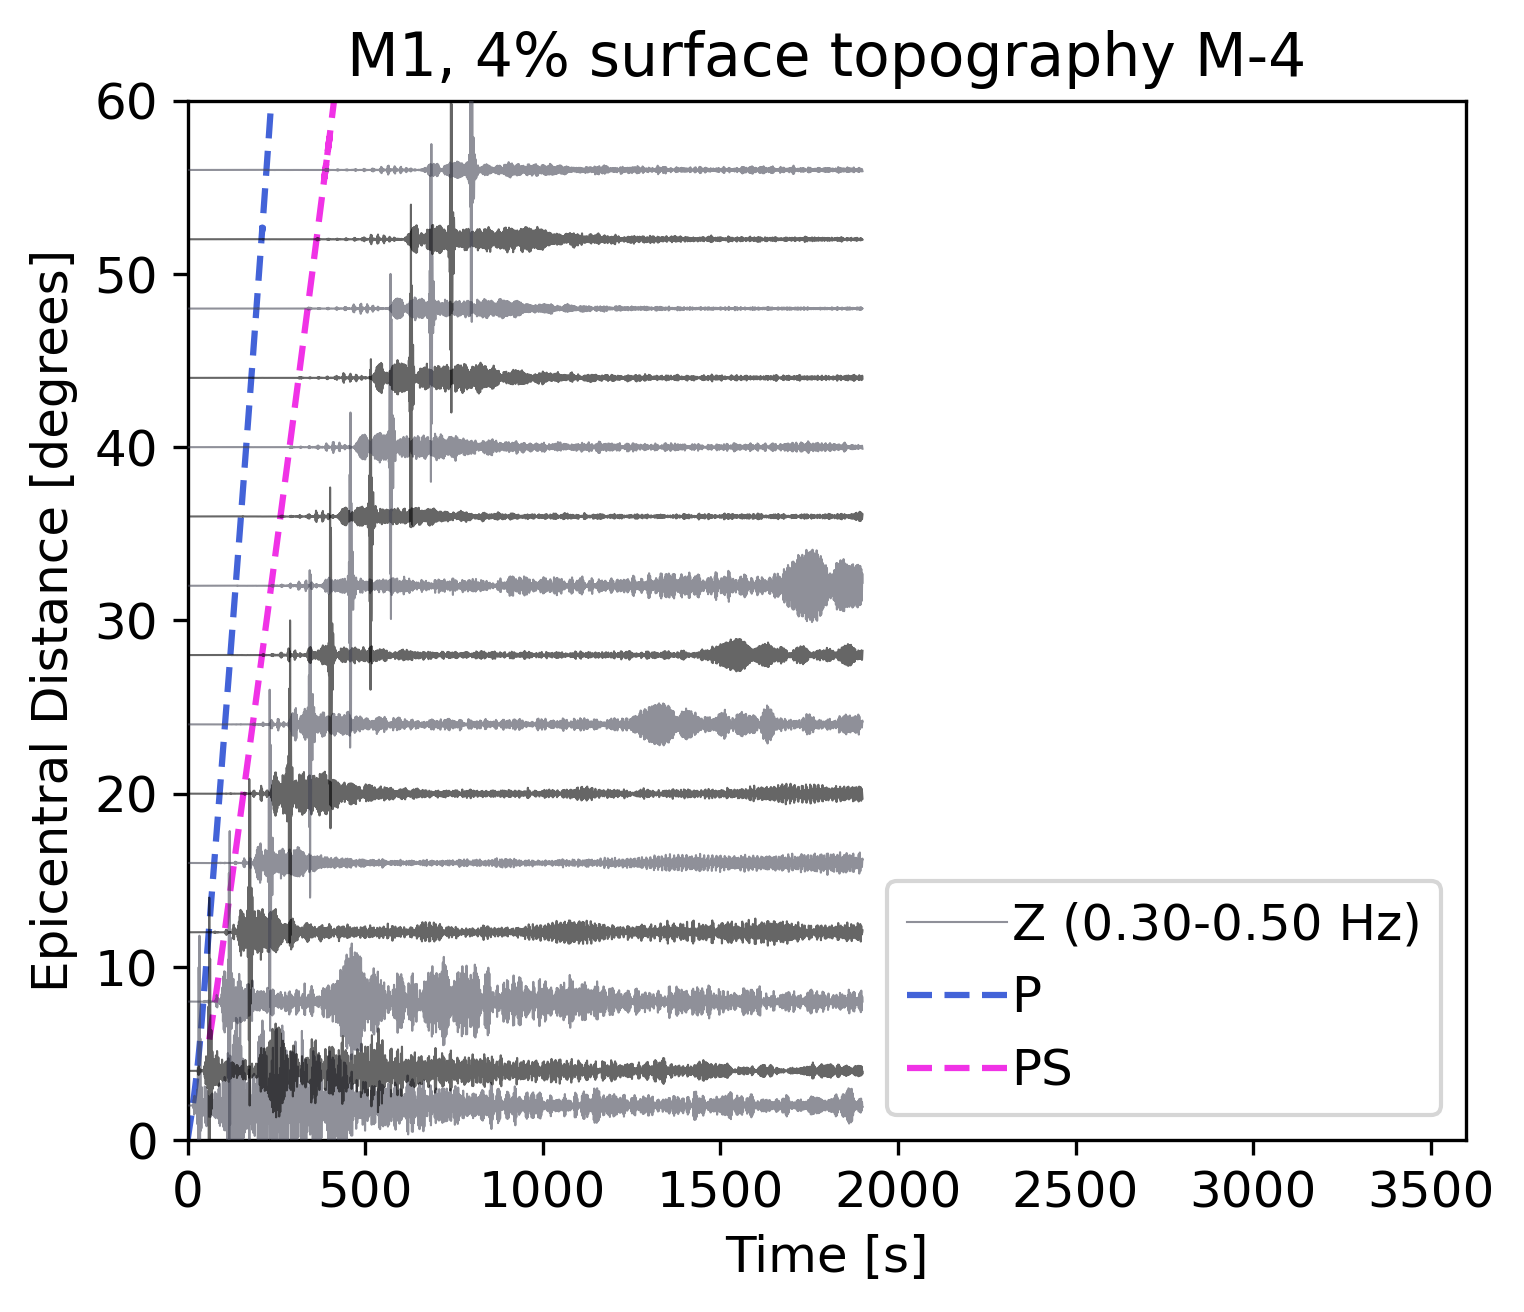

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L4..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L8..Z  | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L12..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L16..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L20..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L24..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L28..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L32..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L36..Z | 1970-01-01T00:00:00.094000Z - 1970-01-01T00:31:40.069000Z | 4.1 Hz, 7701 samples
LO.L40..Z | 1970-01-01T00:00:00.094000Z - 1970-

In [25]:
############################################################################
# specify a run name  
run = '148_ISSI_atten_surface_2'  
run_title = "ISSI M1, surface topography, surface explosion"  
short_title = "M1, 4% surface topography M-4"  
# model for TauP  
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=10,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.861160Z - 1970-01-01T01:00:09.786600Z | 4.1 Hz, 14697 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.861160Z - 1970-01-01T01:00:09.786600Z | 4.1 Hz, 14697 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 147_ISSI_atten_Moho_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


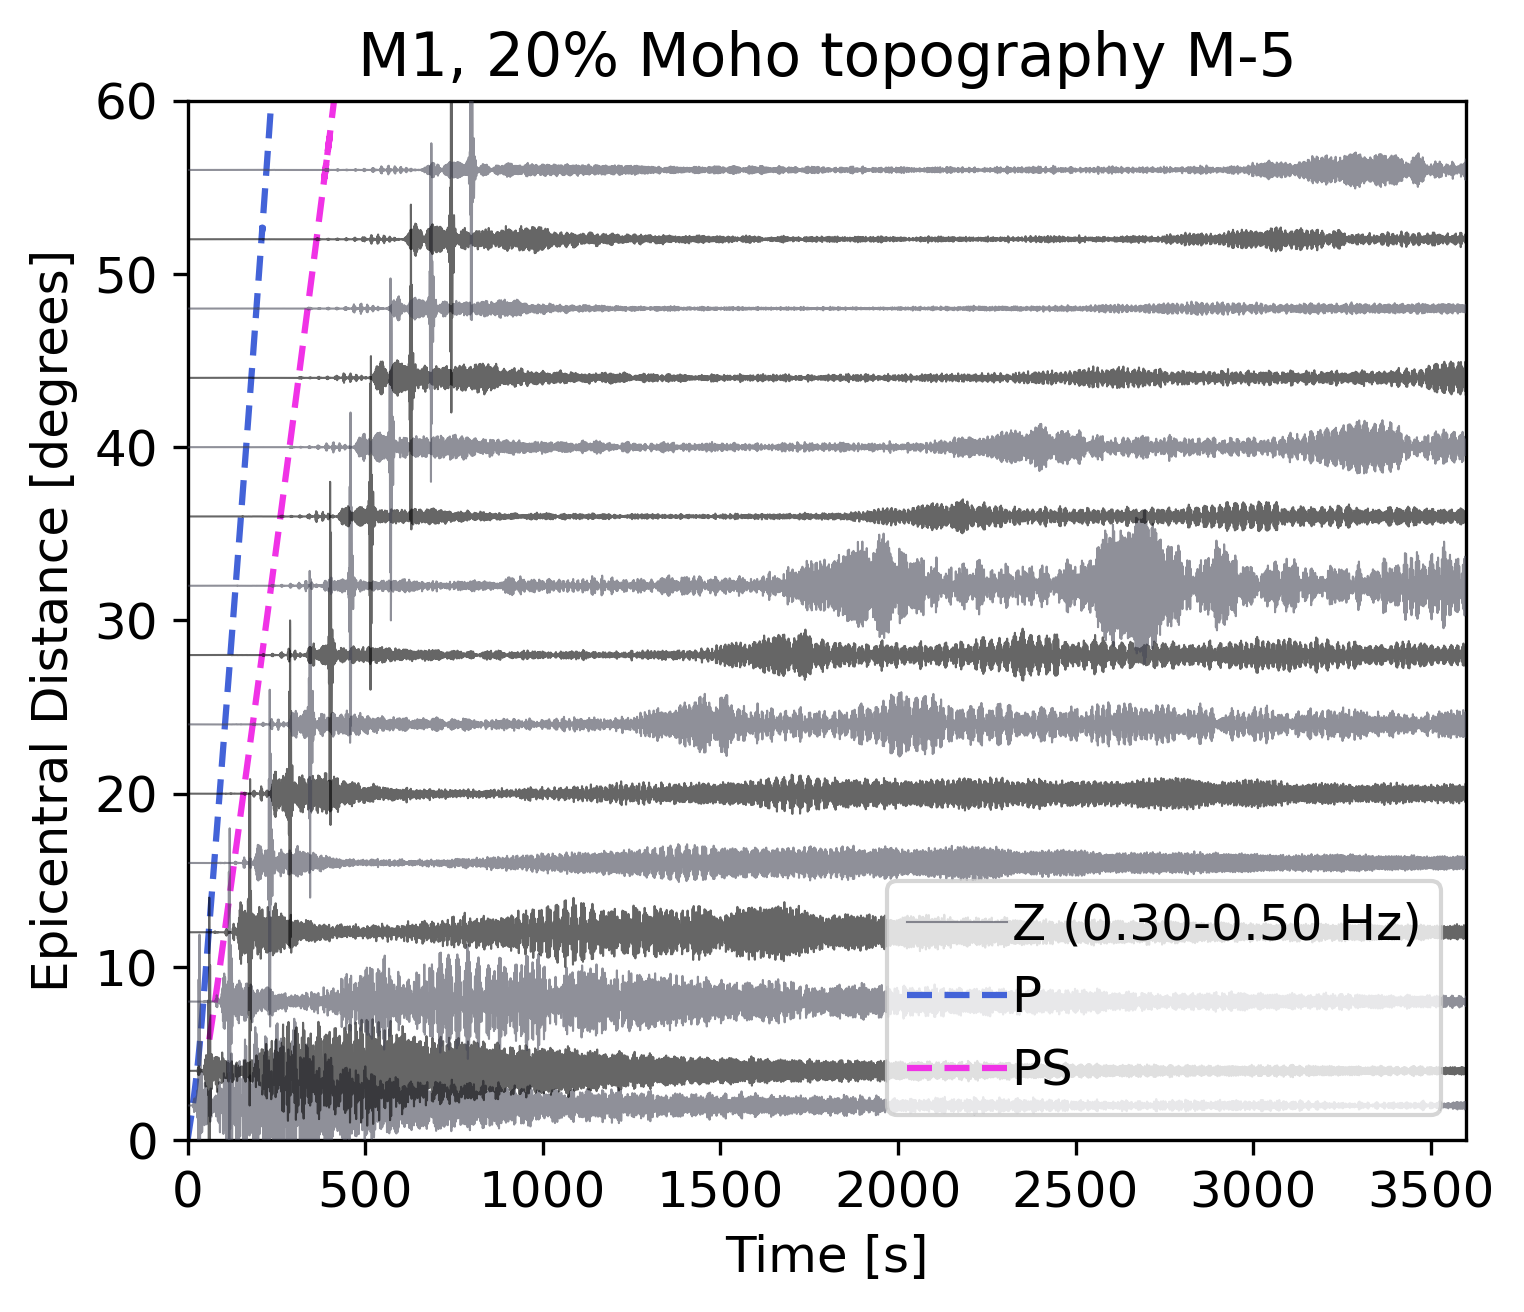

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L4..Z  | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L8..Z  | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L12..Z | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L16..Z | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L20..Z | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L24..Z | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L28..Z | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L32..Z | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L36..Z | 1970-01-01T00:00:00.106800Z - 1970-01-01T00:59:59.961000Z | 4.1 Hz, 14656 samples
LO.L40..Z | 1970-01-01T00:00:00.10680

In [26]:
############################################################################
# specify a run name  
run = '147_ISSI_atten_Moho_2'  
run_title = "ISSI M1, 20% Moho topography, surface explosion"  
short_title = "M1, 20% Moho topography M-5"  
# model for TauP  
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=10,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.860380Z - 1970-01-01T01:00:09.810660Z | 4.0 Hz, 14615 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.860380Z - 1970-01-01T01:00:09.810660Z | 4.0 Hz, 14615 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 166w_ISSI_atten_combi_50_nr_100_constant_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


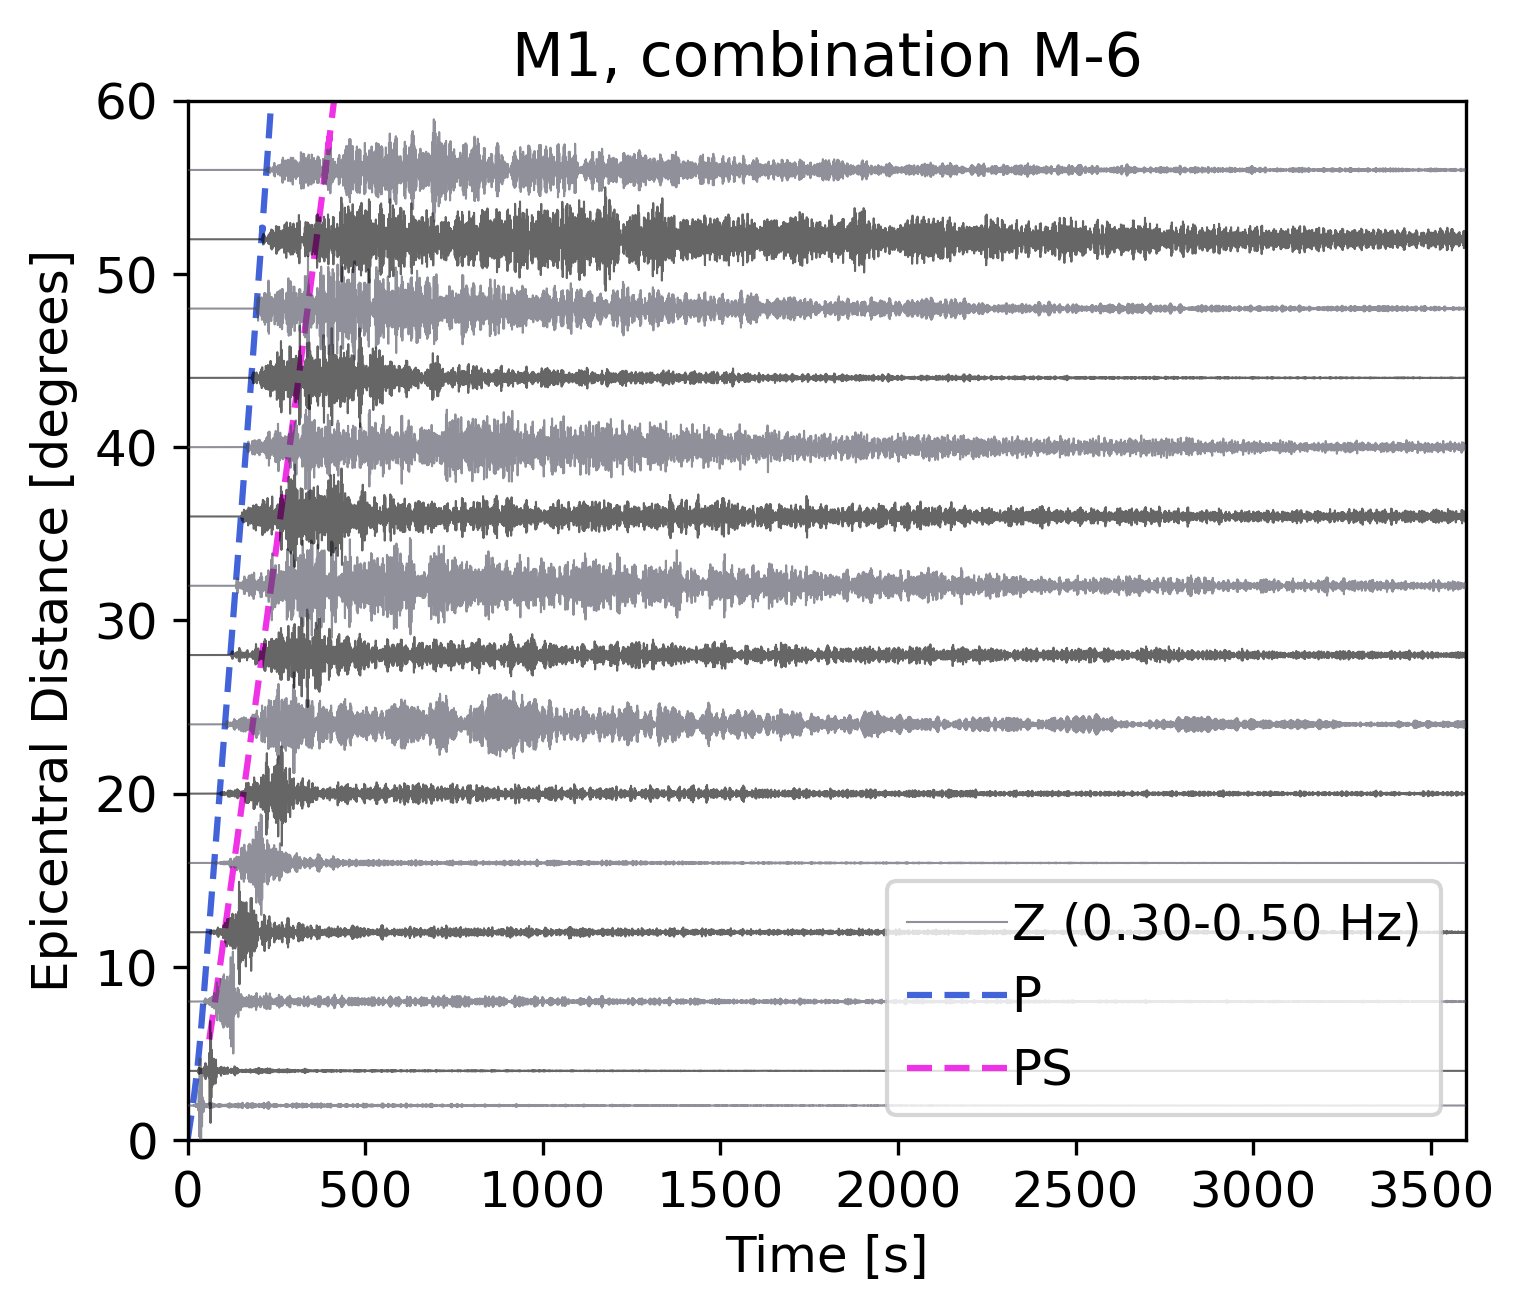

15 Trace(s) in Stream:
LO.L2..Z  | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L4..Z  | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L8..Z  | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L12..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L16..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L20..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L24..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L28..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L32..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L36..Z | 1970-01-01T00:00:00.107400Z - 1970-01-01T00:59:59.929860Z | 4.0 Hz, 14574 samples
LO.L40..Z | 1970-01-01T00:00:00.10740

In [19]:
############################################################################
# specify a run name  
run = '166w_ISSI_atten_combi_50_nr_100_constant_2'  
run_title = "ISSI M1, surface topography, 20% Moho topography, ±50% scatter linear from 0 to 50 km, surface explosion"  
short_title = "M1, combination M-6"  
# model for TauP  
model_taup='ISSI_MOON_M1_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=3,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )

45
Z
45 Trace(s) in Stream:

LO.L2..R | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples
...
(43 other traces)
...
LO.L56..Z | 1969-12-31T23:59:59.734410Z - 1970-01-01T01:00:09.960570Z | 4.1 Hz, 14727 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
L2 60.636228872787086
L4 121.27245774557377
L8 242.54491549114792
L12 363.81737323672206
L16 485.08983098229584
L20 606.3622887278701
L24 727.6347464734438
L28 848.9072042190181
L32 970.1796619645919
L36 1091.4521197101662
L40 1212.7245774557402
L44 1333.9970352013142
L48 1455.269492946888
L52 1576.5419506924618
L56 1697.8144084380358
event_depth=0
CURRENT RUN: 135_VPREMOON_atten_no_LVZ_2
Normalized
Bandpass filtered between 0.30 and 0.50 Hz


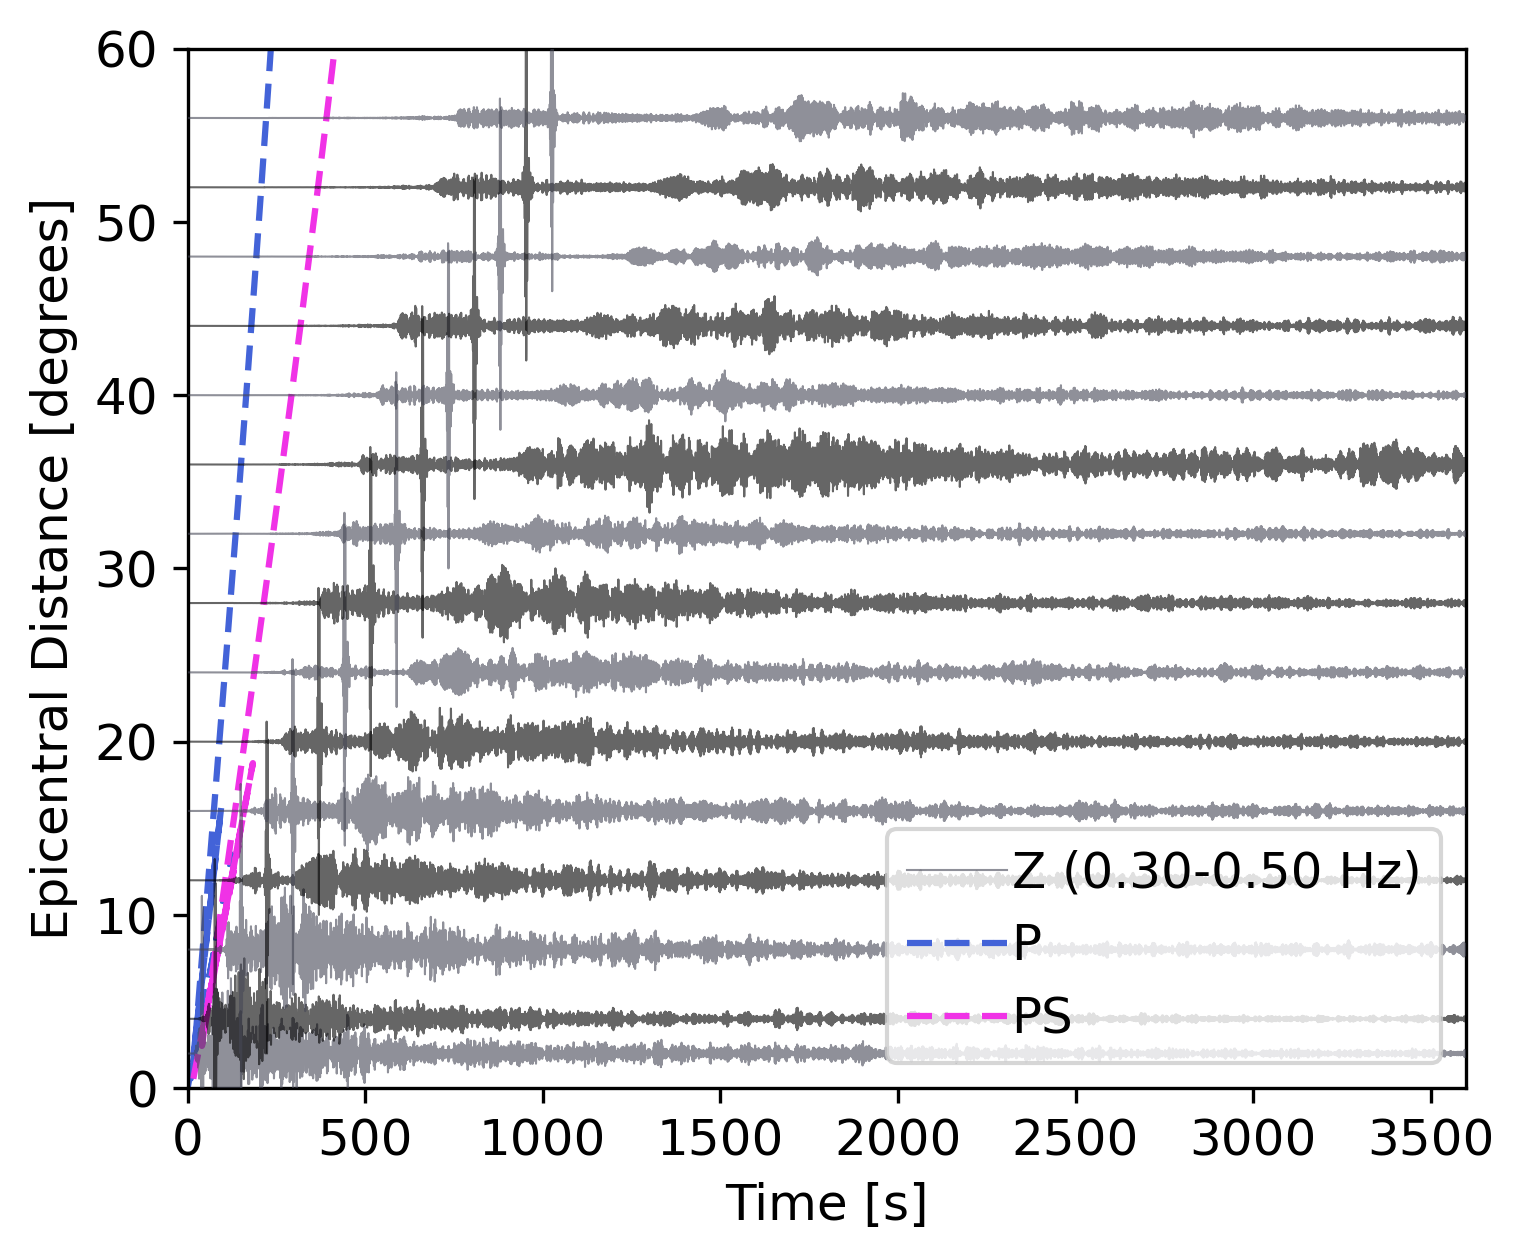

15 Trace(s) in Stream:
LO.L2..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L4..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L8..Z  | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L12..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L16..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L20..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L24..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L28..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L32..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L36..Z | 1969-12-31T23:59:59.979570Z - 1970-01-01T00:59:59.909010Z | 4.1 Hz, 14685 samples
LO.L40..Z | 1969-12-31T23:59:59.97957

In [23]:
############################################################################
# specify a run name  
run = '135_VPREMOON_atten_no_LVZ_2'  
short_title = "VPREMOON (no LVZ) VL0"  
run_title = "VPREMOON without LVZ, surface explosion"  
short_title = ''  
# model for TauP  
model_taup='VPREMOON_atten_no_LVZ_taup'

freqmin=0.3
freqmax=0.5

simulation_stream = Stream()
for tr in original_stream_dict[run]:
    if tr.stats.network =='LO' and tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 60:
        
        mod1 = round(tr.stats.distance_in_degree) % 4
        if mod1 == 0:
            simulation_stream.append(tr)
        elif tr.stats.distance_in_degree < 3.9:
            simulation_stream.append(tr)           
                   

simulation_stream.sort(keys=['distance_in_degree'])
        
print(len(simulation_stream))

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,1,1,1
             ]

plot_epicentral_distance_taup(original_stream=simulation_stream,inv=None,
#                               catalogs=None,
                              seismogram_show=True,model_taup=calculated_taup_dict[model_taup],
                         title=short_title,freqmin=freqmin,freqmax=freqmax,scale=10,scale_list=scale_list,taup_height=0.25,
                         startsecond=0, endsecond=3600,observations=False, channel='Z', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","PS"], raw=False, 
#                               pre_filt_env=[[0.2,0.3,0.5,0.6]],
                              pre_filt_env=None,
                              smooth_periods=10,
                              save_fig=False,
                              catalogs=None,seismograms_vertical=False,figsize=(5.5, 4.5),legend_loc='lower right',ncol=1
                             )